In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 9.9 MB/s eta 0:00:00


In [2]:
#Import libs
import ultralytics
import random
import os
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
#Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Universidad/Tesis/Datasets/dataset"

In [ ]:
def randomVisualization(path,dataset='train'):
  image = random.choice(os.listdir(path+"/data/"+dataset+"/images"))
  label = image.replace(".JPG", ".txt")
  img = plt.imread(path+"/data/"+dataset+"/images/"+image)
  dim = img.shape
  fig, ax = plt.subplots(1,2, figsize=(10,10))

  labels = ["Tronco","1 año","2 años","3 años o más"]
  colors = ['red','green','yellow','orange']
  lines = []
  with open(path+"/data/"+dataset+"/labels/"+label, "r") as f:
    lines = f.readlines()
  for line in lines:
    coordX = []
    coordY = []
    line = line.split(" ")
    id = int(line[0])
    for i in range(1, len(line)):
      if float(line[i]) == 2.0:
        coordX.append(float(line[i-2])*dim[1])
        coordY.append(float(line[i-1])*dim[0])
    ax[1].plot(coordX, coordY, color = colors[id] ,linewidth=1, marker='o',markersize=2)
  fig.suptitle("Imagen "+image.replace(".JPG","")+" del conjunto "+dataset)
  ax[0].set_title("Original")
  ax[0].axis('off')
  ax[0].imshow(img)
  for i in range(4):
    ax[1].plot([], [], label=labels[i],color=colors[i])
  ax[1].set_title("Etiquetada")
  ax[1].axis('off')
  ax[1].legend()
  ax[1].imshow(img)

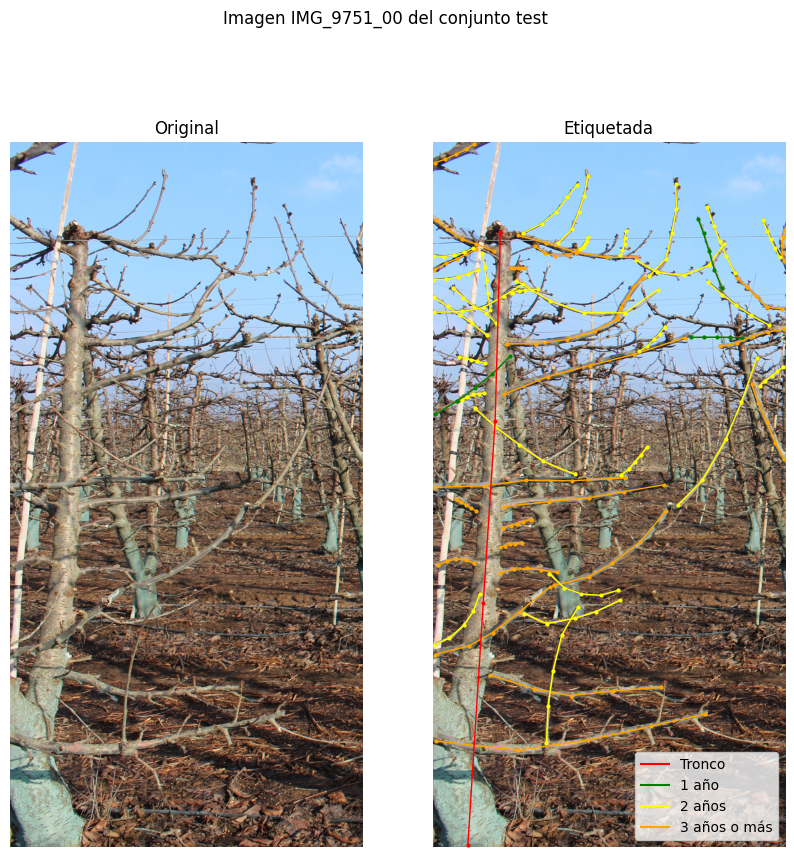

In [ ]:
randomVisualization(path,'test')

In [5]:
#Load model
model = ultralytics.YOLO('yolo11n-pose.pt')  # build a new model from YAML
#Train model
results = model.train(data=path+"/data.yaml", epochs=200, imgsz=1300,fliplr=0.5,batch=16)

100%|██████████| 5.97M/5.97M [00:00<00:00, 229MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=1300, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 755k/755k [00:00<00:00, 119MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[5, 3]
Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True

100%|██████████| 5.35M/5.35M [00:00<00:00, 261MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[1300] must be multiple of max stride 32, updating to [1312]


train: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/train/labels.cache... 40 images, 3 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/val/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1312 train, 1312 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200      13.1G      3.447      7.787     0.6424      4.178      3.022        409       1312: 100%|██████████| 3/3 [00:15<00:00,  5.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all          5        225    0.00376     0.0204    0.00228   0.000443          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200      13.6G      3.411      7.677     0.6444      4.075      2.996        485       1312: 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          5        225      0.009     0.0391    0.00634    0.00101          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/200      13.5G      3.248      7.692     0.6382      3.971      2.778        617       1312: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all          5        225     0.0127     0.0497     0.0118    0.00385          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/200      14.3G      3.095      7.708     0.6379       3.87      2.566        751       1312: 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all          5        225     0.0108     0.0698     0.0106    0.00329          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/200      14.4G      2.866      7.595     0.6315      3.717      2.296        595       1312: 100%|██████████| 3/3 [00:04<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all          5        225     0.0134     0.0919     0.0143    0.00512          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/200        13G      2.749      7.512     0.6257      3.517      2.217        718       1312: 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all          5        225     0.0187      0.109     0.0169    0.00624          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/200        14G      2.615      7.467     0.6183      3.402      2.102        791       1312: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

                   all          5        225     0.0695     0.0512     0.0272    0.00649          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/200        15G      2.526      7.416     0.6175      3.313      2.036        471       1312: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all          5        225      0.074     0.0704     0.0328    0.00882          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/200      15.3G      2.435      7.374     0.6057      3.175      1.946        489       1312: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          5        225      0.272     0.0495     0.0303     0.0096          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/200      14.4G      2.288      7.235     0.6069      3.117      1.858        606       1312: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all          5        225      0.274     0.0563     0.0288      0.011   0.000185    0.00225   9.35e-05   9.35e-06



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/200      13.9G       2.27        7.2     0.5996      3.036      1.874        441       1312: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all          5        225     0.0439      0.138     0.0491     0.0227    0.00506     0.0124    0.00268   0.000268



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/200      12.9G      2.311      7.054     0.5962      2.951      1.911        560       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all          5        225      0.098     0.0787     0.0495     0.0213    0.00577    0.00793     0.0018   0.000191



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/200      12.3G      2.199       6.94     0.5923      2.892      1.818        445       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all          5        225      0.348      0.086     0.0702     0.0325     0.0051    0.00793    0.00221   0.000324



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/200      14.8G      2.195       6.97     0.5785      2.824      1.825        382       1312: 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          5        225      0.347      0.146     0.0713     0.0345      0.263     0.0153    0.00207   0.000465



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/200      13.9G      2.117       6.81     0.5718      2.717      1.736        479       1312: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          5        225      0.337       0.21      0.117     0.0344       0.26    0.00852    0.00357   0.000422



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/200      14.8G      2.147      6.767       0.56      2.641      1.755        633       1312: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all          5        225        0.1      0.175     0.0805     0.0303    0.00606     0.0266    0.00339   0.000636



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/200      13.5G      2.117      6.741     0.5617      2.648      1.741        431       1312: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          5        225      0.409      0.122     0.0708     0.0348      0.305      0.021    0.00989    0.00217



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/200      12.9G      2.064      6.588     0.5541      2.563      1.692        542       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          5        225      0.413      0.129     0.0736     0.0371     0.0211     0.0613     0.0127    0.00308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/200      13.2G      1.995      6.557     0.5457       2.54       1.64        440       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          5        225      0.398      0.163     0.0755     0.0368      0.309     0.0778     0.0257    0.00573



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/200        13G      1.975      6.455     0.5365      2.453      1.636        523       1312: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          5        225      0.373      0.181     0.0749     0.0365      0.309      0.104     0.0296    0.00798



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/200        14G      1.988      6.366      0.529      2.418      1.628        611       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          5        225      0.396      0.177     0.0876     0.0416       0.32      0.114       0.04     0.0113



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/200      14.3G      2.039      6.474     0.5253      2.469      1.667        424       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all          5        225      0.395      0.174     0.0861     0.0388      0.326      0.121     0.0434     0.0144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/200      12.7G      1.978      6.354     0.5149      2.373      1.613        777       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all          5        225      0.392      0.196     0.0835     0.0406      0.319      0.144     0.0442     0.0139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/200      13.6G      1.893      6.247     0.5214      2.399      1.587        436       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          5        225      0.417      0.169     0.0921     0.0425       0.31      0.127     0.0381     0.0138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/200      14.6G       1.96      6.272     0.5006      2.346      1.596        524       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          5        225      0.151      0.163     0.0932     0.0478     0.0632      0.213     0.0477     0.0159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/200      13.7G       1.92      6.164     0.4971      2.313      1.564        540       1312: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          5        225      0.418      0.173     0.0986     0.0494      0.058      0.142     0.0403     0.0139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/200      12.8G      1.886      6.121     0.5012      2.312      1.587        501       1312: 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all          5        225      0.139      0.172     0.0922     0.0522      0.059     0.0806     0.0305     0.0103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/200      12.7G      1.827      6.006     0.4957      2.244      1.536        556       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all          5        225        0.4       0.16     0.0865     0.0465     0.0679      0.122     0.0385     0.0112



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/200      12.2G      1.831      5.872     0.4778      2.199      1.509        602       1312: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          5        225        0.4       0.16     0.0865     0.0465     0.0679      0.122     0.0385     0.0112



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/200      13.6G      1.923      5.939     0.4617      2.222      1.543        574       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all          5        225      0.376      0.178     0.0812     0.0382     0.0756      0.148     0.0415     0.0128



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/200      14.1G      1.947      5.967     0.4706      2.273      1.568        468       1312: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all          5        225      0.374      0.179     0.0928     0.0374     0.0684      0.138     0.0373     0.0117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/200      13.9G      1.852      5.857     0.4774      2.155      1.538        680       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          5        225      0.398      0.173     0.0865     0.0367     0.0713      0.162     0.0395     0.0106



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/200      13.3G      1.821      5.709     0.4649      2.167      1.509        449       1312: 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all          5        225      0.398      0.173     0.0865     0.0367     0.0713      0.162     0.0395     0.0106



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/200      14.4G      1.804      5.649     0.4527       2.19      1.501        477       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all          5        225      0.403      0.157     0.0771     0.0375      0.337      0.117     0.0434     0.0126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/200      13.2G      1.795      5.608     0.4575      2.142      1.496        502       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          5        225      0.408      0.155     0.0986     0.0494      0.345       0.11     0.0471     0.0155



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/200        13G      1.781       5.65     0.4672      2.123      1.501        638       1312: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all          5        225      0.457      0.128     0.0951     0.0494      0.313      0.125     0.0519     0.0167



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/200      13.9G      1.798       5.58     0.4541      2.113      1.484        448       1312: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all          5        225      0.457      0.128     0.0951     0.0494      0.313      0.125     0.0519     0.0167



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/200      13.4G      1.734      5.464     0.4473      2.053      1.462        482       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all          5        225      0.383       0.15     0.0854     0.0432      0.313      0.172      0.052     0.0155



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/200      12.8G      1.762      5.521     0.4491      2.085      1.481        696       1312: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all          5        225      0.391      0.191     0.0884     0.0449      0.326      0.141     0.0524     0.0161



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/200      13.2G      1.746        5.4     0.4405       2.09      1.473        443       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all          5        225      0.412      0.184     0.0894     0.0435      0.355      0.113     0.0546     0.0175



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/200      14.3G      1.729      5.451     0.4487      2.086      1.483        573       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all          5        225      0.412      0.184     0.0894     0.0435      0.355      0.113     0.0546     0.0175



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/200      13.6G      1.711      5.326     0.4297      1.975      1.421        593       1312: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          5        225      0.131       0.26     0.0992     0.0474      0.101      0.159     0.0614     0.0189



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/200      13.5G      1.706      5.177     0.4365      1.977      1.449        510       1312: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all          5        225      0.129      0.151     0.0755     0.0331      0.072      0.169     0.0474     0.0167



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/200      13.9G      1.727      5.208     0.4182      2.003      1.421        819       1312: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          5        225      0.339      0.152     0.0626     0.0278      0.317      0.156     0.0427     0.0144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/200        15G      1.771      5.303     0.4264      2.019      1.467        459       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all          5        225      0.339      0.152     0.0626     0.0278      0.317      0.156     0.0427     0.0144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/200      12.3G      1.661      5.141     0.4207      1.932      1.415        467       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all          5        225      0.373       0.14     0.0726     0.0337      0.333      0.103     0.0444     0.0151



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/200      13.3G      1.632      5.123     0.4279      1.913      1.407        423       1312: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all          5        225      0.406      0.153     0.0849     0.0378       0.37      0.134     0.0514      0.017



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/200      14.4G      1.616      5.019     0.4213        1.9      1.383        438       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all          5        225      0.119      0.131     0.0768      0.036     0.0974      0.145     0.0517     0.0174



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/200      14.2G      1.655      5.024     0.4054      1.867      1.398        500       1312: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          5        225      0.119      0.131     0.0768      0.036     0.0974      0.145     0.0517     0.0174



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/200      13.4G      1.649      5.007     0.4138      1.877      1.383        633       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          5        225      0.103      0.281      0.095     0.0358      0.337      0.158     0.0541     0.0202



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/200      13.9G      1.632      5.019      0.421      1.862      1.419        497       1312: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all          5        225      0.163      0.315      0.119     0.0468      0.378       0.18     0.0735     0.0272



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/200        14G      1.627       4.88     0.4018      1.834       1.37        626       1312: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          5        225      0.386      0.211      0.128     0.0487      0.346      0.192     0.0615      0.025



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/200      13.8G      1.627      4.847     0.3895      1.836      1.367        591       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          5        225      0.386      0.211      0.128     0.0487      0.346      0.192     0.0615      0.025



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/200      13.4G       1.63      4.857     0.3973      1.847      1.388        664       1312: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          5        225      0.386      0.131      0.113     0.0493      0.258      0.203      0.124     0.0286



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/200      12.5G      1.634      4.833     0.3854      1.858      1.376        550       1312: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all          5        225      0.147      0.184      0.103      0.042      0.375      0.188       0.16     0.0423



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/200      13.5G      1.559      4.617     0.3895      1.782       1.36        739       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          5        225       0.14      0.251      0.108      0.047      0.181      0.299      0.149     0.0437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/200      15.3G      1.643      4.743     0.3906      1.846       1.38        472       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          5        225       0.14      0.251      0.108      0.047      0.181      0.299      0.149     0.0437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/200      13.3G        1.6      4.585     0.3946      1.764      1.367        530       1312: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          5        225      0.145      0.232      0.102     0.0488      0.122      0.225      0.081      0.029



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/200      13.6G      1.614      4.657     0.3841      1.775      1.351        660       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all          5        225        0.4      0.238       0.11     0.0489      0.371      0.196     0.0709     0.0248



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/200      13.7G      1.535      4.534     0.3945      1.764      1.348        451       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          5        225      0.287      0.272      0.167      0.057      0.381      0.173      0.075     0.0267



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/200      12.7G      1.578      4.474     0.3706      1.736      1.354        655       1312: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all          5        225      0.287      0.272      0.167      0.057      0.381      0.173      0.075     0.0267



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/200      14.5G      1.586       4.52      0.383      1.751      1.361        796       1312: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all          5        225       0.17      0.189      0.126     0.0586      0.108      0.213     0.0896     0.0348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/200      13.7G       1.59      4.455     0.3725      1.773      1.359        443       1312: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          5        225       0.21      0.207      0.132     0.0623      0.243      0.199      0.113     0.0429



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/200      13.4G      1.545      4.347     0.3731      1.669      1.343        622       1312: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all          5        225      0.387      0.171      0.177     0.0761      0.156      0.283      0.134      0.047



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/200      12.9G      1.449      4.192       0.37      1.632      1.302        505       1312: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all          5        225      0.387      0.171      0.177     0.0761      0.156      0.283      0.134      0.047



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/200      13.4G       1.46      4.138     0.3711       1.61      1.285        417       1312: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          5        225      0.208      0.308      0.159     0.0646      0.142      0.151     0.0849     0.0337



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/200      13.8G      1.522      4.238     0.3711      1.645       1.32        543       1312: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          5        225      0.221      0.208      0.149     0.0575      0.139      0.176     0.0875     0.0317



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/200      13.5G      1.513      4.182     0.3492      1.657      1.293        805       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          5        225      0.198      0.283       0.14     0.0581      0.134      0.189      0.097     0.0391



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/200      12.3G      1.513      4.171     0.3621      1.642      1.309        575       1312: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          5        225      0.198      0.283       0.14     0.0581      0.134      0.189      0.097     0.0391



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/200      13.6G      1.479        4.1     0.3544      1.575      1.267        503       1312: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          5        225      0.245      0.201      0.125     0.0549      0.164      0.166     0.0923     0.0348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/200      14.7G      1.474      4.132     0.3551      1.588      1.272        723       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


                   all          5        225      0.226      0.178      0.125     0.0559      0.159      0.166     0.0956     0.0375

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/200      14.3G      1.457      4.037     0.3525      1.575      1.266        532       1312: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all          5        225      0.184      0.213      0.139      0.065      0.154      0.268      0.119     0.0469



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/200      14.2G      1.471      3.988     0.3433      1.577      1.259        617       1312: 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all          5        225      0.184      0.213      0.139      0.065      0.154      0.268      0.119     0.0469



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/200      14.7G      1.429      3.904     0.3447      1.537      1.259        530       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          5        225      0.232      0.251      0.168     0.0692      0.189      0.215      0.126     0.0515



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/200      14.6G      1.437      3.913     0.3745       1.57      1.272        407       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          5        225      0.193        0.3      0.157     0.0732      0.175      0.224      0.129     0.0468



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/200      13.5G      1.425      3.824     0.3458      1.534      1.264        630       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all          5        225      0.169      0.291       0.13      0.059      0.179      0.276      0.124     0.0422



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/200      13.4G      1.433      3.777     0.3328      1.523      1.261        453       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all          5        225      0.169      0.291       0.13      0.059      0.179      0.276      0.124     0.0422



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/200      14.4G      1.576      4.059     0.3319      1.626      1.322        722       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


                   all          5        225      0.158       0.21      0.112     0.0532      0.187      0.129     0.0888     0.0389

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/200      14.5G      1.422      3.813     0.3512      1.522      1.244        335       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all          5        225      0.167      0.166      0.107     0.0503       0.15      0.127     0.0914      0.041



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/200      13.9G      1.492      3.898     0.3476      1.561      1.288        575       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all          5        225     0.0973      0.214     0.0934      0.042      0.114      0.157     0.0826     0.0356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/200      12.6G       1.35       3.61     0.3282      1.474      1.226        428       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          5        225     0.0973      0.214     0.0934      0.042      0.114      0.157     0.0826     0.0356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/200      13.3G      1.421      3.714     0.3362      1.471      1.245        530       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          5        225      0.202      0.252      0.148     0.0472      0.107       0.17     0.0747     0.0328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/200        14G      1.404      3.589     0.3392       1.46      1.231        628       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all          5        225      0.198      0.236      0.151     0.0539      0.145      0.205      0.085     0.0376



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/200      13.1G      1.431      3.691     0.3193      1.525      1.261        462       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all          5        225      0.229       0.24      0.157     0.0575      0.432      0.143     0.0863     0.0437

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/200      13.9G      1.403      3.607     0.3125      1.461      1.215        728       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all          5        225      0.229       0.24      0.157     0.0575      0.432      0.143     0.0863     0.0437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/200      13.6G      1.397      3.633     0.3122      1.456      1.238        661       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all          5        225      0.192       0.19      0.108     0.0513      0.167      0.182     0.0924     0.0424



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/200      13.5G      1.371      3.514      0.321      1.465      1.222        579       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all          5        225      0.159      0.213      0.102     0.0452      0.166      0.163     0.0841      0.035



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/200      14.5G      1.381      3.524       0.32      1.444       1.23        526       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]


                   all          5        225      0.171      0.205       0.11     0.0453      0.131      0.163      0.085     0.0371

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/200      12.9G        1.4      3.468     0.3256      1.465      1.236        575       1312: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          5        225      0.171      0.205       0.11     0.0453      0.131      0.163      0.085     0.0371



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/200      13.5G      1.359      3.389       0.33      1.457      1.225        473       1312: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.192      0.201      0.107     0.0486      0.136      0.204     0.0885     0.0382



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/200      13.3G      1.364      3.396     0.3152      1.414      1.214        376       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all          5        225      0.196      0.212      0.164     0.0554      0.193       0.21      0.104      0.039



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/200      13.8G      1.367      3.426      0.317      1.407      1.214        760       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          5        225      0.308       0.23      0.177     0.0627      0.171      0.172      0.105     0.0432



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/200      12.6G      1.335      3.331     0.3218      1.391      1.204        652       1312: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          5        225      0.308       0.23      0.177     0.0627      0.171      0.172      0.105     0.0432



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/200      13.5G      1.365      3.418      0.325      1.434      1.225        521       1312: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all          5        225      0.335      0.236      0.171     0.0605      0.158      0.215     0.0921     0.0398



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/200      14.1G      1.367      3.375     0.3116      1.399      1.215        526       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all          5        225      0.397      0.285      0.207     0.0743      0.159      0.185     0.0875     0.0408



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/200        14G       1.35      3.326     0.3173       1.37       1.22        502       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          5        225      0.299      0.245      0.184     0.0624      0.179      0.171     0.0925     0.0414



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/200      12.8G      1.335      3.176     0.3119      1.375      1.199        416       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all          5        225      0.299      0.245      0.184     0.0624      0.179      0.171     0.0925     0.0414



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/200      12.3G      1.339      3.321     0.3189      1.363      1.214        622       1312: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          5        225      0.353      0.232      0.189      0.066      0.154      0.193     0.0925     0.0435



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/200        13G      1.305      3.219     0.3153      1.367      1.183        455       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all          5        225      0.251       0.27      0.201     0.0686      0.151      0.202     0.0915     0.0446

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/200      13.1G       1.35      3.251     0.3162      1.369       1.21        524       1312: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          5        225      0.233      0.267      0.208     0.0733       0.18      0.211      0.135     0.0471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/200      13.2G      1.387      3.274     0.2878      1.361      1.206        679       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          5        225      0.233      0.267      0.208     0.0733       0.18      0.211      0.135     0.0471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/200      12.9G      1.284      3.087      0.313      1.309      1.181        548       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          5        225       0.25      0.268      0.213     0.0747      0.193      0.239      0.128     0.0515



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/200      14.7G      1.403      3.338     0.3062      1.417      1.217        982       1312: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


                   all          5        225      0.274      0.243      0.211     0.0846      0.222      0.257      0.145     0.0578

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/200      14.3G      1.267      3.046     0.3105      1.301      1.171        474       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all          5        225      0.321      0.227      0.185     0.0747      0.234      0.252      0.166     0.0601

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/200      13.6G      1.349      3.198     0.2854       1.33      1.185        679       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          5        225      0.321      0.227      0.185     0.0747      0.234      0.252      0.166     0.0601



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/200      13.2G      1.288      3.103      0.311      1.326      1.187        511       1312: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          5        225      0.285      0.203      0.155     0.0698      0.116      0.183     0.0997     0.0454



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/200      13.8G      1.261      3.066     0.3053       1.28      1.165        505       1312: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.214      0.244      0.165     0.0694      0.168      0.197        0.1     0.0436



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/200      13.5G      1.303      3.058     0.2986      1.301      1.199        500       1312: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all          5        225      0.277      0.327      0.224     0.0748      0.443        0.2      0.124     0.0528



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/200      13.9G       1.31       2.97     0.3086      1.293      1.184        610       1312: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          5        225      0.277      0.327      0.224     0.0748      0.443        0.2      0.124     0.0528



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/200      13.5G      1.289      2.958     0.3203      1.277      1.191        450       1312: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.186      0.291      0.138     0.0602      0.494       0.18      0.122     0.0515



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/200      12.7G      1.313      3.023     0.2996      1.263      1.185        642       1312: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          5        225      0.238      0.315      0.179     0.0611      0.146      0.219      0.118     0.0502



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/200      13.1G      1.263      2.849     0.2995      1.244      1.166        664       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all          5        225      0.388      0.268      0.204     0.0721      0.147       0.21     0.0963      0.043



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/200      12.8G      1.234      2.833      0.297      1.201      1.147        566       1312: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          5        225      0.388      0.268      0.204     0.0721      0.147       0.21     0.0963      0.043



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/200      13.6G       1.23      2.897     0.2915      1.217      1.148        519       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all          5        225      0.417      0.285      0.204     0.0719      0.275      0.231      0.125     0.0434



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/200      14.5G      1.273          3     0.3061      1.267      1.172        413       1312: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          5        225      0.401        0.3      0.211     0.0701      0.165      0.206      0.107     0.0397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/200        14G       1.26      2.938     0.3339      1.269      1.176        346       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          5        225      0.261      0.272      0.146      0.058      0.241      0.255      0.139     0.0471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/200      13.8G       1.29      2.832     0.2747      1.238      1.156        808       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          5        225      0.261      0.272      0.146      0.058      0.241      0.255      0.139     0.0471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/200      13.9G      1.246      2.779     0.3184      1.267      1.165        316       1312: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all          5        225      0.271      0.271       0.16     0.0578      0.245      0.247      0.155     0.0564



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/200        14G       1.25      2.727     0.2902      1.222      1.156        543       1312: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          5        225      0.271      0.286      0.141     0.0578      0.263      0.263      0.126     0.0492



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/200      14.3G      1.268      2.828     0.2982      1.219      1.159        680       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all          5        225      0.485      0.176      0.148     0.0585      0.449      0.163     0.0957     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/200        15G      1.217      2.646     0.2855       1.18      1.138        392       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          5        225      0.485      0.176      0.148     0.0585      0.449      0.163     0.0957     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/200        13G      1.241      2.674     0.2612      1.177      1.127        711       1312: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all          5        225      0.502      0.174      0.129     0.0596      0.478      0.142     0.0878     0.0453



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/200      13.6G      1.225      2.807     0.3122      1.181       1.16        412       1312: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all          5        225      0.177      0.287      0.161     0.0614      0.179       0.19      0.099     0.0442



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/200      13.9G      1.203      2.616     0.2811       1.18      1.141        465       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all          5        225      0.183      0.249      0.144     0.0622      0.255      0.272      0.177     0.0552

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/200      13.7G      1.303      2.791     0.2777      1.218       1.16        687       1312: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


                   all          5        225      0.183      0.249      0.144     0.0622      0.255      0.272      0.177     0.0552

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/200      12.7G      1.165      2.559     0.2826      1.121      1.124        619       1312: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all          5        225      0.157      0.239      0.127     0.0542      0.167      0.205      0.105     0.0482



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/200      13.4G      1.213      2.633     0.2695      1.179      1.128        631       1312: 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all          5        225      0.136      0.202     0.0946     0.0448      0.145      0.235       0.11     0.0457



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/200      13.8G      1.174      2.625     0.2929      1.145      1.123        660       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          5        225      0.158      0.168     0.0874     0.0391      0.245      0.209      0.125     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/200      13.6G      1.193      2.674     0.2741      1.138      1.134        537       1312: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          5        225      0.158      0.168     0.0874     0.0391      0.245      0.209      0.125     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/200      13.6G      1.192      2.565     0.2613      1.126      1.121        573       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all          5        225      0.196      0.146        0.1     0.0481       0.28      0.239      0.139     0.0528



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/200      13.9G      1.192      2.584      0.265      1.216      1.128        372       1312: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all          5        225       0.26      0.199      0.149     0.0584      0.304      0.237      0.162     0.0645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/200      13.2G      1.211      2.539     0.2665      1.143      1.119        543       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          5        225      0.283      0.272      0.182     0.0668      0.299      0.258      0.165     0.0737



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/200      13.6G       1.19      2.609     0.2759      1.144      1.123        547       1312: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all          5        225      0.283      0.272      0.182     0.0668      0.299      0.258      0.165     0.0737

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/200        15G      1.126       2.45     0.3105        1.1      1.106        614       1312: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all          5        225      0.294      0.302      0.189     0.0695      0.304      0.296      0.176      0.075



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/200      13.1G      1.196      2.605     0.2793      1.116      1.125        606       1312: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          5        225      0.283      0.282      0.174     0.0704      0.223      0.248       0.15     0.0685



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/200      13.4G      1.202      2.566     0.2582       1.12      1.127        511       1312: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all          5        225      0.296      0.276      0.189     0.0746      0.273      0.259      0.204     0.0744



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/200      13.1G      1.169      2.436     0.2493      1.105      1.096        493       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all          5        225      0.296      0.276      0.189     0.0746      0.273      0.259      0.204     0.0744



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/200      14.7G      1.152      2.428      0.253      1.129      1.115        325       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          5        225      0.245      0.325       0.19     0.0779      0.228      0.293       0.19     0.0656



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/200      14.5G      1.179       2.54     0.2619      1.104      1.107        499       1312: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          5        225       0.23      0.287      0.187     0.0755      0.217      0.308      0.166     0.0622



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/200        13G      1.152       2.48     0.2913       1.11      1.122        505       1312: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          5        225      0.238      0.306      0.198       0.07      0.203      0.278      0.146     0.0609



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/200      12.5G       1.18       2.51     0.2831      1.105      1.124        491       1312: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          5        225      0.238      0.306      0.198       0.07      0.203      0.278      0.146     0.0609



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/200      13.9G      1.157      2.502     0.2811      1.069      1.116        399       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          5        225      0.225      0.256      0.133     0.0595      0.237      0.265      0.147     0.0669



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/200      13.6G      1.239      2.568     0.2788      1.145      1.139        618       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all          5        225      0.247      0.269      0.202     0.0656      0.239      0.256      0.198      0.083



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/200      14.4G      1.178      2.457     0.2733      1.094      1.123        610       1312: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.265      0.244       0.19     0.0588      0.241      0.227      0.183     0.0794



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/200      13.3G      1.129       2.36     0.2845      1.076      1.107        363       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all          5        225      0.265      0.244       0.19     0.0588      0.241      0.227      0.183     0.0794



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/200      12.5G      1.108      2.256     0.2562       1.03      1.097        505       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          5        225      0.271      0.236       0.14     0.0532      0.259      0.218      0.168      0.082

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/200      13.9G      1.143      2.388     0.2828       1.07      1.118        672       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


                   all          5        225      0.285      0.239      0.178     0.0631      0.242      0.228      0.178     0.0761

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/200      13.4G      1.158      2.365     0.2616      1.072       1.12        515       1312: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all          5        225      0.268      0.267      0.186     0.0675      0.246      0.316      0.194     0.0684



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/200      14.6G      1.206      2.445     0.2378      1.094      1.112        484       1312: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          5        225      0.268      0.267      0.186     0.0675      0.246      0.316      0.194     0.0684



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/200      14.7G      1.231      2.478     0.2403       1.12      1.118        727       1312: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all          5        225      0.303      0.256      0.171     0.0678      0.253      0.293      0.152     0.0641

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/200      14.6G      1.125      2.388     0.2717      1.039      1.091        425       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          5        225      0.382      0.216      0.175     0.0722      0.233      0.267      0.136     0.0625



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/200        14G      1.131      2.268     0.2477      1.038      1.085        691       1312: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          5        225      0.434      0.211      0.176     0.0707      0.408      0.192       0.16     0.0623



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/200      12.8G      1.134      2.345     0.2767      1.078      1.087        404       1312: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all          5        225      0.434      0.211      0.176     0.0707      0.408      0.192       0.16     0.0623



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/200      14.2G      1.114      2.278     0.2518      1.029      1.072        571       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all          5        225      0.389      0.231      0.194     0.0735      0.322       0.23      0.154     0.0659



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/200      12.9G      1.114       2.37     0.2803      1.035      1.098        454       1312: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          5        225      0.335      0.247      0.188     0.0705      0.318      0.241      0.156      0.068



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/200      12.4G      1.075      2.213     0.2768      1.013      1.072        583       1312: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all          5        225      0.298      0.258      0.188     0.0683      0.291      0.238      0.156     0.0703



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/200      13.8G      1.145      2.369     0.2654      1.069       1.11        592       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all          5        225      0.298      0.258      0.188     0.0683      0.291      0.238      0.156     0.0703



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/200      12.6G      1.075      2.276     0.2838     0.9943      1.089        615       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


                   all          5        225      0.284      0.265      0.176      0.069      0.272      0.249      0.148     0.0711

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/200      13.4G      1.098      2.366     0.2856      1.051        1.1        492       1312: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all          5        225      0.281      0.276      0.192     0.0734      0.259      0.273       0.18     0.0705

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/200      13.1G      1.072       2.15     0.2609     0.9868      1.067        581       1312: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all          5        225      0.546      0.196      0.217     0.0745      0.209        0.2      0.141     0.0583



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/200      13.3G      1.091      2.299     0.2623      1.022      1.078        751       1312: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          5        225      0.546      0.196      0.217     0.0745      0.209        0.2      0.141     0.0583



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/200      12.2G      1.071      2.166     0.2326     0.9686      1.063        706       1312: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          5        225      0.483       0.23      0.214     0.0766      0.411      0.139      0.151     0.0535



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/200      13.2G      1.159       2.47      0.266      1.074      1.113        700       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all          5        225      0.503      0.216      0.211      0.075      0.239      0.292      0.176      0.056



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/200      12.9G      1.054      2.173     0.2889     0.9875      1.083        446       1312: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all          5        225      0.297      0.233      0.182     0.0644      0.282      0.226      0.185     0.0727

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/200      13.1G      1.075      2.233     0.2707     0.9979      1.082        581       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all          5        225      0.297      0.233      0.182     0.0644      0.282      0.226      0.185     0.0727



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/200      13.7G      1.059      2.123     0.2637     0.9813      1.062        584       1312: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          5        225       0.42      0.177      0.151     0.0634      0.553      0.212      0.224     0.0975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/200        15G      1.102      2.179     0.2373      1.001      1.072        458       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all          5        225       0.57      0.214      0.216     0.0677      0.534      0.194      0.227     0.0959



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/200      13.3G       1.12      2.318     0.2678      1.032      1.104        579       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          5        225      0.549       0.21      0.214      0.069      0.342      0.241      0.212     0.0829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/200      14.2G      1.098      2.258     0.2307     0.9775      1.057        526       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all          5        225      0.549       0.21      0.214      0.069      0.342      0.241      0.212     0.0829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/200      13.4G       1.08      2.184     0.2601     0.9894      1.078        577       1312: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all          5        225      0.335      0.242      0.193     0.0699       0.27      0.269      0.185       0.07



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/200      14.4G      1.112      2.223     0.2583     0.9961      1.091        455       1312: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          5        225      0.278      0.267      0.191     0.0736      0.236      0.247      0.161      0.067



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/200      11.9G      1.036       2.13     0.2789     0.9497      1.068        523       1312: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          5        225      0.315      0.247      0.193     0.0714      0.234       0.28      0.165     0.0738



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/200      13.8G      1.058       2.27      0.282     0.9775      1.079        385       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all          5        225      0.315      0.247      0.193     0.0714      0.234       0.28      0.165     0.0738



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/200      12.9G      1.044      2.145      0.273     0.9881      1.064        447       1312: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all          5        225      0.381      0.245      0.208     0.0749      0.329      0.211      0.191     0.0666



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/200      13.8G      1.093      2.174     0.2462     0.9819      1.065        707       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all          5        225      0.373      0.234      0.204     0.0656      0.316      0.224      0.188     0.0672



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/200      14.2G        1.1      2.235      0.286      1.012       1.09        356       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all          5        225      0.304      0.278        0.2     0.0663      0.294      0.264       0.16     0.0699

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/200      14.6G      1.117      2.195     0.2442     0.9993      1.069        567       1312: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all          5        225      0.304      0.278        0.2     0.0663      0.294      0.264       0.16     0.0699



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/200      12.6G       1.05      2.149     0.2663     0.9659      1.066        731       1312: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all          5        225      0.431      0.216      0.202     0.0696      0.314      0.271       0.17      0.069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/200      14.2G      1.085      2.218     0.2531     0.9765      1.075        649       1312: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          5        225      0.361      0.263      0.203     0.0677      0.277      0.207      0.126     0.0637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/200      13.8G      1.093      2.202     0.2559     0.9617      1.076        603       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


                   all          5        225      0.348      0.269      0.192     0.0684      0.285      0.209      0.122     0.0594

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/200      12.5G       1.11      2.323     0.2727      1.011      1.103        547       1312: 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all          5        225      0.348      0.269      0.192     0.0684      0.285      0.209      0.122     0.0594



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/200      13.7G      1.021        2.1     0.2565     0.9481       1.06        502       1312: 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          5        225      0.342      0.269      0.204     0.0729      0.277      0.221      0.128     0.0597



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/200      12.7G      1.092      2.156     0.2513     0.9796      1.073        868       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          5        225      0.329      0.295      0.201     0.0762      0.301      0.272      0.158     0.0684



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/200      12.2G      1.063      2.085     0.2678     0.9754      1.071        655       1312: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          5        225      0.308      0.294      0.199     0.0754      0.295       0.27      0.169     0.0803



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/200      14.4G      1.074      2.099     0.2584      0.979      1.081        428       1312: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          5        225      0.308      0.294      0.199     0.0754      0.295       0.27      0.169     0.0803



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/200      12.9G      1.085      2.127     0.2719     0.9883       1.09        406       1312: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all          5        225      0.322      0.295      0.199     0.0785      0.289      0.266      0.172      0.073



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/200      13.2G      1.021        2.1     0.2718      0.934      1.076        529       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all          5        225      0.324      0.299      0.198     0.0773      0.309       0.28      0.182     0.0741



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/200      14.5G      1.095      2.202     0.2616      0.979      1.072        560       1312: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          5        225      0.311      0.287      0.188     0.0763      0.289      0.281      0.175     0.0713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/200      13.8G      1.038      2.044     0.2387     0.9343      1.057        655       1312: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all          5        225      0.311      0.287      0.188     0.0763      0.289      0.281      0.175     0.0713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/200      13.7G      1.104      2.144     0.2517     0.9992       1.07        536       1312: 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          5        225      0.308      0.277      0.187     0.0762      0.285      0.274      0.184     0.0721


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/200      11.3G      1.177      2.035     0.1342      1.293      1.104        228       1312: 100%|██████████| 3/3 [00:07<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          5        225      0.304       0.27      0.188     0.0754      0.284      0.271      0.175     0.0727



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/200        12G      1.115      1.924     0.1528      1.156       1.09        291       1312: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5        225      0.276      0.274      0.182     0.0728      0.265      0.266      0.164     0.0692



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/200      12.1G      1.255      2.159       0.16      1.318      1.142        364       1312: 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          5        225      0.276      0.274      0.182     0.0728      0.265      0.266      0.164     0.0692



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/200        12G      1.147      2.049     0.1491      1.171      1.095        385       1312: 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          5        225      0.266       0.32      0.183     0.0732      0.244      0.296      0.161     0.0693



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/200      11.9G        1.1      1.903     0.1423      1.184      1.072        204       1312: 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all          5        225       0.27      0.272      0.185     0.0764      0.255      0.261      0.161     0.0715



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/200        12G      1.082      1.901     0.1553       1.09      1.074        228       1312: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all          5        225      0.273      0.274      0.185     0.0752      0.254      0.267      0.149     0.0766



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/200      11.8G      1.046      1.947      0.189      1.142      1.084        179       1312: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          5        225      0.273      0.274      0.185     0.0752      0.254      0.267      0.149     0.0766



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/200        11G      1.084      1.881     0.1441      1.072      1.073        390       1312: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all          5        225      0.276      0.274      0.187     0.0756      0.255      0.263      0.143     0.0753



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/200      11.2G      1.086      1.989     0.1547      1.111       1.08        207       1312: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all          5        225      0.275      0.277      0.186     0.0758       0.26      0.269      0.135     0.0745



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/200      11.1G      1.097      1.919     0.1436      1.046      1.075        318       1312: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          5        225      0.268      0.272      0.186     0.0735      0.257      0.257      0.133     0.0745



200 epochs completed in 0.285 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 5.7MB
Optimizer stripped from runs/pose/train/weights/best.pt, 5.7MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-pose summary (fused): 257 layers, 2,655,217 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]


                   all          5        225       0.57      0.213      0.215     0.0676      0.535      0.191      0.225     0.0959
                 trunk          3          6          1      0.313      0.352     0.0418          1      0.309       0.43      0.158
              1yearold          5         20       0.24        0.2     0.0989       0.04      0.181       0.15     0.0993     0.0287
              2yearold          5         88      0.499      0.114      0.172     0.0819        0.5      0.114      0.177      0.109
        3ormoreyearold          5        111      0.542      0.225      0.238      0.107       0.46      0.189      0.195     0.0878
Speed: 0.4ms preprocess, 4.4ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/pose/train


In [ ]:
!zip -r /content/drive/MyDrive/Universidad/Tesis/yolo11n_colab.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/pose/ (stored 0%)
  adding: content/runs/pose/train/ (stored 0%)
  adding: content/runs/pose/train/args.yaml (deflated 52%)
  adding: content/runs/pose/train/train_batch2.jpg (deflated 3%)
  adding: content/runs/pose/train/PoseR_curve.png (deflated 16%)
  adding: content/runs/pose/train/confusion_matrix_normalized.png (deflated 25%)
  adding: content/runs/pose/train/PosePR_curve.png (deflated 16%)
  adding: content/runs/pose/train/BoxR_curve.png (deflated 16%)
  adding: content/runs/pose/train/train_batch1.jpg (deflated 3%)
  adding: content/runs/pose/train/BoxPR_curve.png (deflated 16%)
  adding: content/runs/pose/train/results.csv (deflated 67%)
  adding: content/runs/pose/train/PoseP_curve.png (deflated 9%)
  adding: content/runs/pose/train/train_batch0.jpg (deflated 4%)
  adding: content/runs/pose/train/BoxP_curve.png (deflated 8%)
  adding: content/runs/pose/train/confusion_matrix.png (deflated 29%)
  adding: content/runs/

In [ ]:
from google.colab import files
files.download("/content/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = ultralytics.YOLO(path+'best.pt')  # build a new model from YAML

In [ ]:
#Predicts on list of images
results = model(["/content/drive/MyDrive/Universidad/Tesis/Datasets/test1/data/train/images/IMG_9961_01.JPG"])


0: 640x320 6 1yearolds, 7 2yearolds, 10 3ormoreyearolds, 1444.6ms
Speed: 35.4ms preprocess, 1444.6ms inference, 34.1ms postprocess per image at shape (1, 3, 640, 320)


In [ ]:
img = results[0].show()  # This plots the detections on the image


Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Load model
model = ultralytics.YOLO('yolo11n-pose.pt')  # build a new model from YAML
#Train model
results = model.train(data=path+"/data.yaml", epochs=200, imgsz=400,fliplr=0.5,batch=16)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/train/labels.cache... 40 images, 3 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/val/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/pose/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/pose/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200       1.4G      4.122      8.302     0.6435      4.132      2.963        377        416: 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all          5        225    0.00105    0.00568   0.000547   0.000136          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.44G      4.011      8.223     0.6377       4.06      2.962        455        416: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all          5        225    0.00108    0.00568   0.000568    0.00014          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.42G      4.045      8.192     0.6324      4.026        2.9        566        416: 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225    0.00206     0.0096    0.00107   0.000289          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.47G      3.785      8.193     0.6348      3.899      2.651        694        416: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all          5        225    0.00302     0.0519    0.00168   0.000332          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/200       1.6G      3.676      8.072     0.6346       3.81      2.433        547        416: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          5        225    0.00537      0.141     0.0143    0.00601          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.39G      3.534      7.922     0.6333      3.596      2.271        662        416: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all          5        225    0.00791      0.192     0.0107    0.00298          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.41G      3.541      7.836     0.6318      3.475      2.249        698        416: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all          5        225     0.0114       0.16     0.0142    0.00465          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.55G      3.452      7.813     0.6272      3.322      2.174        436        416: 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all          5        225     0.0177      0.176     0.0235    0.00805          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/200       1.6G       3.39      7.771     0.6234      3.205      2.057        459        416: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all          5        225     0.0548     0.0484     0.0408      0.021          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.48G      3.279      7.652     0.6214      3.098      1.997        570        416: 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all          5        225     0.0823     0.0881     0.0447     0.0211          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.47G      3.202      7.592      0.615      2.988      1.986        410        416: 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all          5        225      0.323      0.106     0.0443     0.0106          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.38G       3.22      7.503     0.6173      2.842      2.031        525        416: 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        225      0.566      0.122     0.0402     0.0102      0.252    0.00284   0.000582   5.82e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.42G      2.974      7.302     0.6152      2.723      1.921        406        416: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          5        225     0.0442      0.192     0.0267    0.00778      0.253    0.00284   0.000516   5.16e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.52G      3.066      7.418     0.6112      2.687      1.942        360        416: 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all          5        225      0.296      0.134     0.0257    0.00724    0.00231    0.00284   0.000536   5.36e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.34G      2.947      7.177     0.6034      2.582       1.86        441        416: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all          5        225      0.321     0.0772     0.0334    0.00941     0.0049    0.00568    0.00163   0.000163

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.52G       2.96      7.179     0.5959      2.496      1.854        583        416: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]


                   all          5        225     0.0642      0.072     0.0624      0.019     0.0127    0.00284     0.0019    0.00019

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.41G      2.968      7.174     0.5925      2.505      1.853        400        416: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all          5        225     0.0321     0.0668     0.0226    0.00826      0.256    0.00284    0.00487   0.000898

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.37G      2.874      7.059     0.5881      2.437       1.82        494        416: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all          5        225     0.0336     0.0793     0.0241    0.00852    0.00468    0.00852    0.00324   0.000359



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.41G       2.86      7.052     0.5785      2.428      1.806        404        416: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]

                   all          5        225      0.031     0.0624     0.0275     0.0102     0.0063     0.0114    0.00323   0.000508



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.38G      2.852      6.934     0.5728      2.347      1.779        478        416: 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all          5        225     0.0409     0.0743     0.0356     0.0125     0.0107     0.0318    0.00439   0.000608



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.47G      2.807      6.854     0.5657      2.338      1.731        562        416: 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


                   all          5        225     0.0528      0.107     0.0456     0.0176     0.0168     0.0397    0.00564   0.000844

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.49G       2.87      7.025     0.5635      2.347      1.764        405        416: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          5        225     0.0534       0.13     0.0596     0.0232      0.033     0.0528     0.0121    0.00176



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.36G      2.771      6.889     0.5588      2.285      1.698        694        416: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          5        225      0.103      0.109     0.0646     0.0247      0.029     0.0687      0.018    0.00289



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.45G      2.665      6.753     0.5652      2.317       1.69        406        416: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.98it/s]

                   all          5        225      0.157      0.101      0.071     0.0282     0.0892     0.0368      0.026    0.00474



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.53G      2.699       6.76     0.5523      2.332      1.675        482        416: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]

                   all          5        225      0.396      0.127     0.0739     0.0304      0.325     0.0726     0.0291    0.00551



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.43G      2.676      6.732      0.542      2.274      1.641        498        416: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all          5        225       0.13      0.108     0.0661     0.0281     0.0611     0.0806     0.0276    0.00561



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.38G      2.652      6.709     0.5506      2.275      1.668        476        416: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          5        225      0.117      0.126     0.0781     0.0325     0.0777      0.068      0.033    0.00715



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.35G      2.634      6.624     0.5433      2.235      1.647        517        416: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          5        225     0.0831      0.229     0.0889     0.0369     0.0666      0.097      0.037    0.00821



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/200       1.3G      2.633      6.529     0.5278      2.185      1.656        543        416: 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          5        225     0.0831      0.229     0.0889     0.0369     0.0666      0.097      0.037    0.00821



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.43G      2.644      6.604     0.5174      2.132      1.589        507        416: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]

                   all          5        225     0.0977      0.214     0.0882     0.0328     0.0945     0.0606      0.039    0.00823



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.47G      2.702      6.694     0.5279      2.226      1.621        442        416: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


                   all          5        225      0.115      0.199      0.075     0.0273     0.0658     0.0936     0.0351    0.00893

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.46G      2.632      6.541     0.5301      2.164      1.631        614        416: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.23it/s]

                   all          5        225      0.135      0.183     0.0846     0.0274     0.0554      0.116     0.0297    0.00598



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.43G      2.599      6.428     0.5162      2.173      1.619        427        416: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all          5        225      0.135      0.183     0.0846     0.0274     0.0554      0.116     0.0297    0.00598



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.51G      2.588      6.426     0.5054      2.203      1.601        452        416: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          5        225      0.135      0.182     0.0834     0.0328     0.0645      0.105     0.0372     0.0105



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.39G      2.485      6.285     0.5028      2.128      1.563        470        416: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]


                   all          5        225      0.159      0.228     0.0931     0.0366      0.096     0.0589      0.041     0.0146

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.39G      2.536      6.363     0.5119      2.107      1.573        577        416: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          5        225      0.155      0.183      0.118     0.0479     0.0776     0.0749     0.0416     0.0134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.41G      2.495      6.395     0.5022      2.086      1.541        418        416: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all          5        225      0.155      0.183      0.118     0.0479     0.0776     0.0749     0.0416     0.0134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.41G      2.448       6.27     0.4983      2.051       1.53        448        416: 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          5        225      0.213      0.183      0.116     0.0351     0.0696     0.0816     0.0365    0.00949



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.36G      2.512      6.294      0.502      2.069      1.573        648        416: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          5        225      0.171      0.155      0.112     0.0293     0.0655      0.089      0.051     0.0125



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/200       1.4G      2.423      6.123      0.499       2.11      1.544        412        416: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          5        225      0.205      0.143      0.123     0.0366     0.0571     0.0946     0.0421      0.012



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/200       1.5G      2.432      6.278     0.5037      2.113      1.598        536        416: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


                   all          5        225      0.205      0.143      0.123     0.0366     0.0571     0.0946     0.0421      0.012

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.45G      2.402      6.107     0.4897      2.028      1.507        541        416: 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          5        225      0.175      0.158      0.133      0.046      0.115        0.1     0.0532     0.0147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.43G      2.416      6.078     0.4939      2.078      1.554        466        416: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


                   all          5        225      0.165      0.138      0.122     0.0393      0.123     0.0669     0.0474     0.0113

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.47G      2.442      6.022     0.4681      2.007      1.509        738        416: 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]

                   all          5        225      0.242     0.0971      0.109     0.0301       0.19     0.0818     0.0654     0.0124



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.54G      2.523      6.077     0.4816      2.059      1.554        436        416: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all          5        225      0.242     0.0971      0.109     0.0301       0.19     0.0818     0.0654     0.0124



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.33G      2.375      5.914      0.484      2.044      1.522        430        416: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          5        225      0.123      0.101      0.076     0.0281      0.289      0.083     0.0677     0.0135



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.48G      2.324      5.996     0.4892      2.038      1.525        402        416: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


                   all          5        225      0.127      0.113     0.0809     0.0299     0.0951     0.0594     0.0425     0.0131

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.48G      2.318      5.865     0.4839      2.005      1.491        406        416: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          5        225      0.126      0.117     0.0816     0.0277      0.102      0.125     0.0493     0.0147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.48G      2.364      5.908     0.4689      1.978      1.493        466        416: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all          5        225      0.126      0.117     0.0816     0.0277      0.102      0.125     0.0493     0.0147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.41G      2.387      5.821      0.466       1.97      1.467        570        416: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all          5        225      0.133     0.0997     0.0777     0.0279      0.111     0.0781     0.0487     0.0149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.46G      2.389      5.909     0.4837      1.993      1.509        467        416: 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all          5        225      0.202      0.123     0.0953     0.0348     0.0871      0.089     0.0564     0.0171



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.47G      2.332      5.811     0.4672      1.942      1.447        564        416: 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all          5        225      0.347      0.153      0.155     0.0385     0.0919     0.0606     0.0532     0.0175



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.44G      2.365      5.811      0.462      1.986      1.473        517        416: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          5        225      0.347      0.153      0.155     0.0385     0.0919     0.0606     0.0532     0.0175



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.41G      2.302      5.825     0.4668      1.909      1.458        613        416: 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all          5        225      0.164      0.132     0.0893     0.0309      0.213     0.0779     0.0598     0.0191



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.33G      2.324        5.7     0.4517      1.988      1.477        491        416: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          5        225      0.226      0.152      0.131     0.0429      0.134      0.106     0.0513     0.0179



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.44G      2.235      5.684     0.4615      1.897      1.451        684        416: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all          5        225      0.286      0.138      0.138     0.0669      0.284      0.103      0.106     0.0365

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.55G      2.315      5.645     0.4623      1.955      1.459        426        416: 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all          5        225      0.286      0.138      0.138     0.0669      0.284      0.103      0.106     0.0365

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.41G      2.255      5.575     0.4636      1.877      1.454        501        416: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all          5        225      0.301      0.124      0.134     0.0603      0.183      0.137        0.1      0.038



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.42G      2.305      5.674     0.4545      1.899      1.448        606        416: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all          5        225      0.251      0.121      0.125     0.0559      0.202      0.111      0.111     0.0464



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.45G       2.22      5.577     0.4628      1.883      1.434        430        416: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all          5        225      0.163      0.182      0.134     0.0592      0.144      0.167      0.126     0.0456



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.36G      2.194      5.565     0.4504      1.871      1.412        604        416: 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all          5        225      0.163      0.182      0.134     0.0592      0.144      0.167      0.126     0.0456



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.51G      2.239      5.507     0.4502      1.877      1.431        730        416: 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]


                   all          5        225      0.167      0.164      0.107     0.0445      0.159      0.149      0.121     0.0469

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.43G      2.221      5.481     0.4465      1.888      1.421        401        416: 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all          5        225      0.181      0.161      0.123     0.0545      0.187      0.137      0.121     0.0315



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.42G      2.179      5.381     0.4511       1.81       1.41        586        416: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          5        225      0.229       0.13      0.135     0.0745      0.146      0.167      0.128     0.0432



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.37G      2.129      5.264     0.4446      1.817      1.398        473        416: 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          5        225      0.229       0.13      0.135     0.0745      0.146      0.167      0.128     0.0432



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.42G      2.075      5.208      0.448      1.789      1.352        387        416: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all          5        225      0.253      0.132      0.141     0.0605      0.241      0.125      0.148     0.0517

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.44G      2.163      5.234      0.441       1.79      1.377        501        416: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all          5        225      0.169      0.172      0.144     0.0498      0.179       0.17      0.127     0.0433



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.43G      2.255      5.408     0.4279      1.819      1.396        720        416: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all          5        225      0.218      0.165      0.116      0.037      0.148      0.121     0.0838     0.0288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.32G      2.156      5.128     0.4365      1.789      1.363        526        416: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all          5        225      0.218      0.165      0.116      0.037      0.148      0.121     0.0838     0.0288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.42G      2.124      5.195     0.4238      1.749      1.327        467        416: 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all          5        225      0.213      0.142      0.103     0.0364      0.142       0.16     0.0936     0.0288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.51G      2.127       5.25     0.4287      1.768      1.354        659        416: 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          5        225      0.188      0.144     0.0965     0.0431      0.113       0.12     0.0595     0.0238



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/200       1.5G       2.11      5.102     0.4255      1.719      1.345        500        416: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]


                   all          5        225      0.159      0.168     0.0917     0.0397      0.159      0.149     0.0796     0.0247

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.49G      2.136      5.086     0.4113      1.752      1.352        555        416: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all          5        225      0.159      0.168     0.0917     0.0397      0.159      0.149     0.0796     0.0247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.46G      2.082      4.939     0.4187      1.739      1.347        494        416: 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          5        225      0.132      0.152     0.0859      0.036      0.138      0.145      0.117     0.0306



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.52G      2.107      4.999      0.441      1.771      1.357        379        416: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          5        225      0.128      0.165     0.0767     0.0281      0.127      0.157      0.112     0.0288



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.49G       2.14      5.016     0.4231      1.759      1.382        587        416: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all          5        225      0.161      0.147     0.0824     0.0251      0.103      0.116     0.0801     0.0257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.42G      2.044      4.892     0.4152      1.701      1.327        424        416: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          5        225      0.161      0.147     0.0824     0.0251      0.103      0.116     0.0801     0.0257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/200       1.5G      2.208      5.069     0.4148       1.76       1.38        646        416: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          5        225      0.121       0.16     0.0853     0.0255      0.101      0.155      0.069     0.0259



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.51G       2.09      4.908     0.4297      1.708      1.353        321        416: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


                   all          5        225      0.112      0.207     0.0709     0.0278      0.114      0.149     0.0661     0.0245

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.46G      2.173       5.02     0.4242      1.768      1.376        531        416: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          5        225      0.115      0.201     0.0791     0.0342       0.12      0.155     0.0812     0.0282



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.35G      2.043      4.755     0.4247      1.724      1.342        395        416: 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]

                   all          5        225      0.115      0.201     0.0791     0.0342       0.12      0.155     0.0812     0.0282



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.41G      2.092      4.934     0.4339      1.695      1.359        481        416: 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          5        225      0.137      0.183     0.0957     0.0392      0.115      0.253      0.143     0.0324



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.47G      1.991      4.716     0.4211      1.653      1.302        571        416: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.95it/s]

                   all          5        225      0.133      0.177      0.127     0.0474      0.146      0.214      0.156     0.0395



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.39G      2.089      4.801     0.4046       1.72      1.343        424        416: 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all          5        225      0.174      0.146      0.134     0.0512      0.226      0.144      0.119     0.0416



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.47G      2.089      4.748     0.4086      1.658      1.321        648        416: 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all          5        225      0.174      0.146      0.134     0.0512      0.226      0.144      0.119     0.0416



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.44G      2.009      4.695     0.4053      1.637      1.302        607        416: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          5        225      0.203      0.138      0.142     0.0597       0.22      0.193       0.13     0.0469



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.41G      2.002      4.684     0.4077      1.645      1.299        538        416: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


                   all          5        225      0.179      0.152      0.148     0.0676      0.213      0.207      0.152       0.07

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.49G      2.027      4.696     0.4044      1.643      1.313        489        416: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          5        225      0.179      0.224      0.151     0.0649      0.238      0.238      0.172     0.0717



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.37G      2.058      4.685     0.4051      1.685      1.337        521        416: 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


                   all          5        225      0.179      0.224      0.151     0.0649      0.238      0.238      0.172     0.0717

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.41G      1.994      4.567     0.4108      1.644      1.303        448        416: 100%|██████████| 3/3 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          5        225      0.193      0.221      0.128     0.0448      0.195      0.195      0.119     0.0606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.41G      1.997       4.65     0.4051      1.664      1.306        348        416: 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          5        225      0.202      0.204      0.134     0.0444      0.202      0.169      0.148     0.0672



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.45G       2.02      4.566     0.4072      1.626      1.304        678        416: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all          5        225      0.197      0.174      0.154      0.046      0.231      0.174      0.154     0.0619

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.34G      1.984      4.489      0.406      1.607      1.288        601        416: 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


                   all          5        225      0.197      0.174      0.154      0.046      0.231      0.174      0.154     0.0619

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.33G      1.947      4.438     0.3995      1.628      1.295        488        416: 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


                   all          5        225      0.284      0.178      0.154     0.0562      0.234      0.142      0.104     0.0556

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.47G      2.001      4.531     0.4004      1.621      1.294        479        416: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all          5        225      0.291      0.193      0.148     0.0629      0.289      0.188      0.146     0.0603

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.47G      1.987       4.52     0.4056      1.599      1.313        476        416: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all          5        225      0.204      0.181      0.104     0.0529      0.262       0.17      0.139     0.0626



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.37G      1.952      4.457     0.3976      1.558      1.273        391        416: 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all          5        225      0.204      0.181      0.104     0.0529      0.262       0.17      0.139     0.0626



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.33G       1.97      4.487     0.4044        1.6      1.294        574        416: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          5        225      0.259      0.158      0.118     0.0456      0.344      0.126      0.134     0.0649

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.38G       1.93      4.405     0.4013      1.573       1.26        415        416: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


                   all          5        225      0.203      0.172      0.141     0.0473      0.175       0.17      0.139     0.0701

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/200       1.4G      1.922       4.37     0.4009       1.58      1.279        485        416: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all          5        225      0.217      0.162      0.145     0.0519      0.228      0.157      0.144     0.0686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.41G      2.028        4.5      0.382      1.566      1.285        609        416: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all          5        225      0.217      0.162      0.145     0.0519      0.228      0.157      0.144     0.0686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.38G      1.916      4.221     0.3891      1.537      1.264        504        416: 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all          5        225      0.191      0.174      0.135     0.0544      0.216      0.161      0.148     0.0624



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.49G      2.063      4.535     0.3872      1.589      1.285        871        416: 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all          5        225       0.19      0.168      0.111     0.0526      0.195      0.165      0.133     0.0611



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.49G      1.869      4.235     0.3882      1.523      1.243        441        416: 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          5        225      0.172      0.155      0.104     0.0425      0.192      0.188      0.148     0.0645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.43G      1.947      4.374     0.3805      1.552      1.269        626        416: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          5        225      0.172      0.155      0.104     0.0425      0.192      0.188      0.148     0.0645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/200       1.4G      1.961      4.301     0.3933      1.569      1.285        462        416: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all          5        225      0.147      0.166     0.0914     0.0299      0.248      0.163      0.157      0.069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.45G      1.883      4.248     0.3945      1.539      1.263        473        416: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all          5        225      0.162      0.166      0.154     0.0474      0.186      0.166      0.139     0.0549



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.43G      1.916      4.373     0.3999      1.566      1.281        465        416: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


                   all          5        225      0.169      0.166      0.132     0.0378      0.183      0.214      0.153     0.0572

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.45G      1.952       4.31      0.397      1.551      1.278        562        416: 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          5        225      0.169      0.166      0.132     0.0378      0.183      0.214      0.153     0.0572



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.43G      1.924      4.281       0.39      1.538      1.283        422        416: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          5        225      0.184      0.158      0.133     0.0394      0.193       0.15       0.14     0.0562



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.34G      1.919      4.368     0.3941      1.525      1.263        585        416: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all          5        225      0.201      0.144       0.14     0.0421      0.266      0.174       0.16     0.0611

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/200       1.4G      1.895      4.177      0.377      1.516      1.259        604        416: 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          5        225      0.357      0.108      0.136     0.0551       0.24      0.193      0.155     0.0671



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.37G       1.83      4.081     0.3774      1.451      1.223        514        416: 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all          5        225      0.357      0.108      0.136     0.0551       0.24      0.193      0.155     0.0671



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.44G      1.801      4.154     0.3825      1.462      1.242        478        416: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


                   all          5        225       0.39      0.115      0.144     0.0647      0.175      0.181       0.15     0.0775

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.49G      1.898      4.351     0.3823      1.533      1.279        390        416: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


                   all          5        225      0.293      0.135      0.133     0.0587       0.18      0.215      0.143     0.0747

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.48G      1.884      4.258     0.4014      1.535      1.269        332        416: 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.96it/s]

                   all          5        225      0.353      0.135      0.153     0.0587      0.357      0.137      0.166     0.0831



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.47G      1.961      4.202     0.3708      1.496      1.273        718        416: 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


                   all          5        225      0.353      0.135      0.153     0.0587      0.357      0.137      0.166     0.0831

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.46G      1.846      4.175     0.3983      1.504      1.249        301        416: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all          5        225      0.225      0.172       0.15     0.0498      0.255      0.215      0.175     0.0935

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.47G      1.843      4.126     0.3818       1.47      1.239        497        416: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all          5        225      0.233      0.169      0.158     0.0499      0.292      0.208      0.192      0.104



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.51G      1.859      4.149     0.3787      1.456      1.224        615        416: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          5        225      0.251      0.167      0.158     0.0452      0.246      0.166      0.148     0.0782



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.55G      1.792      3.898     0.3824      1.446      1.211        369        416: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all          5        225      0.251      0.167      0.158     0.0452      0.246      0.166      0.148     0.0782



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.38G      1.864      4.039     0.3426      1.451       1.22        640        416: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]


                   all          5        225      0.178      0.138      0.116     0.0405      0.255      0.164      0.148     0.0743

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.48G      1.819      4.043     0.3874       1.47      1.263        396        416: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          5        225      0.215      0.158      0.128      0.038      0.233      0.164      0.148     0.0459



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.46G      1.822      3.881     0.3657      1.451      1.226        428        416: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all          5        225      0.275      0.143      0.136     0.0397      0.253      0.155      0.148     0.0599



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.41G      1.917      4.146      0.359      1.465      1.237        629        416: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all          5        225      0.275      0.143      0.136     0.0397      0.253      0.155      0.148     0.0599



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.36G      1.742      3.843     0.3604      1.401       1.18        570        416: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]

                   all          5        225      0.218      0.162      0.153     0.0488      0.229      0.168      0.128     0.0603



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/200       1.4G      1.828      3.926     0.3624      1.432      1.203        573        416: 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


                   all          5        225      0.207      0.144       0.15     0.0676      0.185      0.134        0.1     0.0559

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.43G      1.747      3.932     0.3746      1.395      1.206        607        416: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


                   all          5        225      0.192      0.166      0.152     0.0712      0.163      0.118      0.107     0.0491

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.39G      1.789       3.96     0.3662      1.418      1.222        495        416: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all          5        225      0.192      0.166      0.152     0.0712      0.163      0.118      0.107     0.0491

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/200       1.5G      1.815      3.977     0.3571      1.402      1.206        533        416: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          5        225      0.235      0.157      0.151     0.0603      0.183      0.114      0.104     0.0435



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.44G      1.835      3.988     0.3661      1.467      1.232        347        416: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all          5        225       0.21      0.161      0.151     0.0569      0.158      0.119      0.104     0.0478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/200       1.4G      1.818      3.936     0.3583      1.396      1.215        495        416: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        225      0.202      0.173      0.152     0.0657      0.147      0.121      0.102     0.0605



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.43G      1.811      4.019     0.3748      1.432      1.222        498        416: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all          5        225      0.202      0.173      0.152     0.0657      0.147      0.121      0.102     0.0605



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.54G      1.702      3.758     0.3864      1.353      1.198        563        416: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all          5        225      0.212      0.165      0.157     0.0603      0.292      0.189      0.189     0.0886



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.38G      1.804      3.992     0.3727      1.392      1.214        559        416: 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


                   all          5        225      0.195      0.159      0.156     0.0526      0.226      0.166      0.152     0.0819

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/200      1.42G      1.799      3.915     0.3643      1.396      1.223        468        416: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


                   all          5        225      0.222      0.169      0.156     0.0518      0.293      0.208      0.181     0.0864

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.39G      1.768      3.792     0.3385       1.37       1.18        444        416: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          5        225      0.222      0.169      0.156     0.0518      0.293      0.208      0.181     0.0864



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.46G       1.78      3.807     0.3395      1.395       1.21        307        416: 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all          5        225      0.242      0.173      0.167     0.0611      0.298      0.206       0.18     0.0887

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.51G       1.79      3.941     0.3527        1.4      1.198        469        416: 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all          5        225      0.288      0.153      0.167     0.0653      0.172      0.125      0.105     0.0529

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/200       1.4G      1.742      3.827     0.3708      1.382      1.208        474        416: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all          5        225      0.273      0.152      0.153      0.063      0.193      0.124      0.104     0.0488



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.34G      1.832      3.938     0.3625      1.402      1.232        458        416: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all          5        225      0.273      0.152      0.153      0.063      0.193      0.124      0.104     0.0488



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.46G      1.742      3.785     0.3659      1.363      1.194        381        416: 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


                   all          5        225      0.259      0.154      0.149     0.0552      0.217      0.155       0.13     0.0602

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.48G      1.875      4.017     0.3745      1.455      1.239        582        416: 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all          5        225       0.27      0.138      0.142     0.0488      0.301      0.174      0.162     0.0792



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/200       1.5G      1.829      3.909     0.3534      1.406      1.218        578        416: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          5        225      0.201      0.164      0.146     0.0481      0.224      0.197      0.153     0.0824



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.41G      1.773      3.853     0.3759      1.386       1.21        343        416: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

                   all          5        225      0.201      0.164      0.146     0.0481      0.224      0.197      0.153     0.0824



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.33G      1.708      3.644     0.3412      1.335       1.17        470        416: 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


                   all          5        225      0.287      0.147      0.163     0.0483      0.243      0.193       0.17     0.0854

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.39G      1.728      3.835     0.3651      1.372      1.207        624        416: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all          5        225       0.29      0.147      0.159     0.0466      0.281      0.146      0.146      0.084



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.42G      1.808      3.866     0.3516      1.375      1.212        480        416: 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all          5        225      0.343      0.146      0.152      0.046       0.34      0.145      0.145     0.0733

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.51G      1.808      3.791     0.3271      1.377      1.187        444        416: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


                   all          5        225      0.343      0.146      0.152      0.046       0.34      0.145      0.145     0.0733

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.45G      1.832      3.925     0.3289      1.358      1.179        655        416: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all          5        225      0.357      0.146      0.153     0.0482      0.324      0.147      0.144     0.0686

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.51G      1.699      3.732     0.3515      1.316      1.187        397        416: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all          5        225      0.237      0.157      0.136       0.05      0.146      0.121     0.0962     0.0641



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.48G       1.71      3.722     0.3352      1.318      1.172        647        416: 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]

                   all          5        225      0.206      0.181       0.14     0.0567      0.206      0.114     0.0991     0.0645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.37G      1.737      3.696     0.3604      1.357      1.181        375        416: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          5        225      0.206      0.181       0.14     0.0567      0.206      0.114     0.0991     0.0645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.49G      1.698      3.711     0.3437      1.318      1.153        523        416: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all          5        225      0.204       0.17      0.128     0.0559      0.129      0.134      0.109     0.0656



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.37G      1.666      3.636     0.3689      1.329      1.166        430        416: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all          5        225       0.22      0.171      0.129     0.0624      0.128      0.134      0.117     0.0697



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.33G      1.667      3.579     0.3471      1.306      1.171        531        416: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          5        225      0.221      0.165      0.129     0.0612      0.245      0.203      0.156     0.0855



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.38G      1.712      3.778      0.356      1.352      1.194        538        416: 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all          5        225      0.221      0.165      0.129     0.0612      0.245      0.203      0.156     0.0855



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.32G      1.629      3.661     0.3542      1.287      1.175        575        416: 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all          5        225      0.231       0.17       0.14     0.0575      0.248      0.192      0.158     0.0839



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.41G       1.71      3.719     0.3614       1.35      1.187        455        416: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all          5        225      0.204      0.175       0.14     0.0592      0.248        0.2      0.158     0.0821

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.38G      1.697      3.578     0.3412      1.292      1.173        538        416: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          5        225      0.224      0.171      0.141      0.064      0.254      0.212      0.164     0.0792



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.38G      1.657      3.665       0.34      1.294      1.161        691        416: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


                   all          5        225      0.224      0.171      0.141      0.064      0.254      0.212      0.164     0.0792

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.32G      1.668      3.575     0.3237      1.272      1.154        656        416: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all          5        225      0.213      0.181      0.142     0.0642      0.235      0.201      0.158     0.0757

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/200       1.4G      1.795      3.809     0.3497      1.355      1.207        628        416: 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all          5        225      0.211      0.178      0.148     0.0717      0.217      0.206      0.149     0.0708



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.38G      1.637      3.551     0.3491      1.293      1.191        421        416: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all          5        225      0.204      0.172      0.148     0.0665      0.204      0.163      0.127      0.067



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.39G      1.652      3.602     0.3511      1.296      1.175        527        416: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all          5        225      0.204      0.172      0.148     0.0665      0.204      0.163      0.127      0.067



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.38G      1.658      3.533     0.3481      1.296      1.167        541        416: 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]


                   all          5        225      0.198      0.176      0.149     0.0635      0.178      0.179      0.133     0.0701

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.54G      1.708      3.656     0.3404      1.313      1.143        431        416: 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all          5        225      0.185      0.176      0.149     0.0578       0.18      0.176      0.132     0.0698



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.41G       1.73       3.79     0.3485      1.345      1.194        527        416: 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all          5        225      0.196      0.176      0.152     0.0596      0.183      0.188      0.137      0.071



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.49G       1.73       3.75     0.3305      1.292      1.162        493        416: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          5        225      0.196      0.176      0.152     0.0596      0.183      0.188      0.137      0.071



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.41G      1.682      3.603     0.3488      1.286      1.176        528        416: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all          5        225      0.197      0.176      0.169     0.0652      0.193      0.179      0.133     0.0691

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.48G      1.715      3.672     0.3543      1.323      1.176        424        416: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all          5        225      0.209      0.174      0.169     0.0587      0.172      0.136      0.135     0.0692



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.29G      1.641      3.534     0.3502      1.274       1.15        499        416: 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all          5        225      0.221      0.174      0.169      0.059       0.17      0.136      0.131     0.0688



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.46G      1.667      3.662     0.3563      1.283      1.183        369        416: 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all          5        225      0.221      0.174      0.169      0.059       0.17      0.136      0.131     0.0688



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.37G       1.62      3.433     0.3412      1.293      1.157        415        416: 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]


                   all          5        225      0.228      0.171      0.168      0.059      0.182      0.127       0.13      0.065

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.46G      1.664      3.532     0.3394      1.278      1.133        640        416: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all          5        225      0.203      0.163      0.167     0.0588      0.172       0.12      0.127     0.0686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.49G      1.707      3.723      0.366      1.307      1.191        342        416: 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all          5        225      0.192       0.16      0.163      0.054       0.17      0.123      0.126     0.0677



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.51G      1.716      3.645     0.3423      1.257      1.152        506        416: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]

                   all          5        225      0.192       0.16      0.163      0.054       0.17      0.123      0.126     0.0677



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.35G      1.643      3.496     0.3568       1.27      1.148        687        416: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          5        225      0.188      0.158      0.161     0.0545      0.249      0.204      0.173     0.0724



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.46G      1.651      3.613     0.3367      1.251      1.159        606        416: 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


                   all          5        225      0.193      0.161      0.164     0.0594      0.235      0.206      0.201     0.0795

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.45G       1.72      3.692     0.3423      1.311      1.177        557        416: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          5        225      0.204      0.158      0.164       0.06      0.234      0.208      0.197      0.079



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.34G      1.694      3.706     0.3483      1.321      1.191        499        416: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all          5        225      0.204      0.158      0.164       0.06      0.234      0.208      0.197      0.079

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.43G      1.602      3.446     0.3256      1.237      1.159        465        416: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          5        225        0.2      0.155       0.17     0.0624      0.202      0.217      0.197     0.0794



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.35G      1.673      3.544     0.3442      1.261      1.161        755        416: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all          5        225      0.157      0.179      0.157     0.0663      0.197      0.224      0.177     0.0777



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.32G      1.635      3.415     0.3447      1.257      1.159        604        416: 100%|██████████| 3/3 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all          5        225      0.171      0.173      0.153      0.064      0.167      0.187      0.143      0.071



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/200       1.5G      1.677      3.436     0.3389      1.267      1.158        402        416: 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all          5        225      0.171      0.173      0.153      0.064      0.167      0.187      0.143      0.071



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.43G      1.685       3.68     0.3552      1.299      1.186        382        416: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          5        225      0.166      0.165      0.149     0.0665      0.172      0.189      0.145     0.0708



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.38G      1.616      3.526      0.349      1.261      1.175        493        416: 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all          5        225      0.309       0.12      0.147     0.0658      0.182       0.19      0.141     0.0681



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.51G      1.715       3.54     0.3426      1.279       1.16        515        416: 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


                   all          5        225      0.279      0.124      0.146     0.0637       0.19      0.177      0.136     0.0673

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.45G      1.658       3.51     0.3287      1.235      1.162        601        416: 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all          5        225      0.279      0.124      0.146     0.0637       0.19      0.177      0.136     0.0673

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.44G      1.716       3.63     0.3405      1.304      1.162        492        416: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all          5        225      0.247      0.142      0.151     0.0641      0.186       0.18      0.136     0.0663


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.22G      1.699      3.558      0.216      1.607      1.161        209        416: 100%|██████████| 3/3 [00:07<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          5        225      0.228      0.142      0.148     0.0637       0.17      0.177      0.135     0.0656



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/200       1.3G      1.667      3.327     0.2338       1.48      1.168        276        416: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all          5        225      0.227      0.152      0.144     0.0607      0.159      0.183      0.129     0.0637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.28G      1.804      3.698     0.2343      1.575      1.213        338        416: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all          5        225      0.227      0.152      0.144     0.0607      0.159      0.183      0.129     0.0637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/200       1.3G      1.707       3.49     0.2317      1.501      1.177        352        416: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all          5        225      0.203      0.155      0.142     0.0624      0.134      0.188      0.121     0.0625



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.26G      1.637      3.378     0.2322       1.49      1.145        193        416: 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all          5        225      0.205      0.158       0.14     0.0653      0.132      0.191      0.124     0.0655



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/200       1.3G      1.658      3.385     0.2423       1.48       1.18        211        416: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all          5        225      0.198      0.156      0.145     0.0665      0.127      0.191      0.124      0.066



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.29G      1.654      3.363     0.2612      1.508      1.197        168        416: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all          5        225      0.198      0.156      0.145     0.0665      0.127      0.191      0.124      0.066



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.25G      1.651      3.371     0.2327      1.413      1.168        366        416: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          5        225      0.195      0.167      0.146     0.0625      0.126      0.187      0.127      0.067



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.24G      1.686       3.39     0.2353      1.518      1.199        192        416: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all          5        225      0.202      0.164      0.146     0.0619      0.123      0.185      0.128     0.0663



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.25G      1.656      3.329     0.2376      1.389      1.161        289        416: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          5        225      0.201      0.164      0.143     0.0612      0.123      0.185      0.127     0.0657



200 epochs completed in 0.126 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 5.6MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-pose summary (fused): 257 layers, 2,655,217 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


                   all          5        225      0.233      0.169      0.158     0.0497      0.296      0.211      0.192      0.104
                 trunk          3          6      0.422      0.333      0.365     0.0996      0.639        0.5       0.53      0.304
              1yearold          5         20          0          0     0.0131    0.00498          0          0     0.0078    0.00328
              2yearold          5         88      0.337      0.182      0.172     0.0629       0.36      0.182      0.151     0.0718
        3ormoreyearold          5        111      0.172      0.162     0.0804     0.0312      0.184      0.164      0.081     0.0357
Speed: 0.6ms preprocess, 8.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/pose/train2


In [7]:
#Load model
model = ultralytics.YOLO('yolo11n-pose.pt')  # build a new model from YAML
#Train model
results = model.train(data=path+"/data.yaml", epochs=200, imgsz=224,fliplr=0.5,batch=16)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/train/labels.cache... 40 images, 3 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/val/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/pose/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/pose/train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200     0.478G      4.737      8.762     0.6487      4.212      3.005        338        224: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          5        225   0.000683    0.00225   0.000349   6.97e-05    0.00122    0.00509   0.000633   6.33e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200     0.468G      4.626      8.615      0.646      4.136       2.91        397        224: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          5        225   0.000708    0.00225   0.000361   7.22e-05   0.000708    0.00225   0.000368   3.68e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/200     0.461G      4.631      8.649     0.6358       4.11      2.917        508        224: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all          5        225    0.00146     0.0045   0.000746   0.000186   0.000731    0.00225   0.000376   3.76e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/200     0.474G      4.239       8.62     0.6431       4.01      2.717        605        224: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all          5        225    0.00464     0.0901    0.00515   0.000995    0.00118    0.00509   0.000611   6.11e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/200     0.495G       3.95      8.616     0.6428      3.927      2.425        499        224: 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]

                   all          5        225    0.00449      0.132    0.00628    0.00175    0.00116    0.00509   0.000587   5.87e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/200     0.461G      3.881      8.468     0.6403      3.775      2.345        587        224: 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]

                   all          5        225    0.00386      0.132    0.00744    0.00219   0.000622    0.00225   0.000315   3.15e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/200      0.47G      3.843      8.421     0.6425      3.672       2.32        592        224: 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all          5        225    0.00446      0.137    0.00824    0.00263          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/200     0.489G      3.737      8.343     0.6438      3.556      2.209        389        224: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          5        225    0.00474      0.179     0.0148    0.00426          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/200     0.512G      3.616      8.383     0.6409       3.37      2.083        401        224: 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          5        225    0.00241      0.125     0.0116    0.00389          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/200     0.484G      3.685      8.212     0.6417      3.254      2.072        502        224: 100%|██████████| 3/3 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          5        225      0.761      0.125     0.0147    0.00397          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/200     0.493G      3.687      8.097     0.6372      3.136      2.067        375        224: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all          5        225      0.518     0.0833     0.0231    0.00591   0.000758    0.00284   0.000413   4.13e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/200     0.478G      3.698      8.019     0.6383      2.973      2.012        490        224: 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all          5        225       0.55     0.0856     0.0264     0.0059   0.000733    0.00284   0.000451   4.51e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/200     0.482G      3.578      7.752     0.6336      2.792      1.938        348        224: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


                   all          5        225      0.552     0.0529      0.023    0.00513   0.000769    0.00284   0.000556   5.56e-05

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/200     0.489G      3.658      7.891     0.6352      2.814      1.972        318        224: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          5        225       0.53     0.0552      0.021    0.00439    0.00146    0.00284   0.000561   5.61e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/200     0.461G      3.592      7.662     0.6344      2.723      1.899        396        224: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]


                   all          5        225      0.564      0.101     0.0459    0.00799          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/200     0.514G      3.541      7.633     0.6264      2.585      1.881        517        224: 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


                   all          5        225      0.603      0.108     0.0751     0.0118          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/200     0.478G      3.545      7.548     0.6295      2.556       1.88        362        224: 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all          5        225      0.649       0.11      0.104     0.0229      0.504    0.00225   0.000282   2.82e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/200      0.48G      3.483      7.498     0.6248       2.51      1.852        443        224: 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.91it/s]

                   all          5        225     0.0675       0.15     0.0658     0.0102      0.505    0.00225   0.000461   4.61e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/200     0.484G      3.541      7.493     0.6179      2.428       1.84        365        224: 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all          5        225     0.0503      0.101     0.0441     0.0073      0.254    0.00225   0.000682   6.82e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/200      0.48G      3.431      7.356     0.6182      2.352      1.772        420        224: 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all          5        225      0.061      0.108      0.029    0.00641    0.00598    0.00225   0.000919   9.19e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/200     0.487G      3.403       7.32     0.6172      2.325      1.741        495        224: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all          5        225     0.0696      0.152     0.0295    0.00618    0.00835    0.00225   0.000942   0.000116



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/200     0.491G      3.448      7.406     0.6092      2.293      1.778        370        224: 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all          5        225     0.0603      0.139      0.024    0.00679    0.00312     0.0135    0.00153   0.000176



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/200     0.472G      3.396      7.262      0.606      2.265      1.702        601        224: 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


                   all          5        225     0.0766      0.134     0.0279    0.00678    0.00483     0.0169    0.00216   0.000264

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/200     0.474G       3.34      7.185     0.6105      2.255      1.747        364        224: 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


                   all          5        225     0.0546      0.137     0.0306    0.00783     0.0141    0.00793     0.0025   0.000275

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/200     0.493G      3.309      7.084     0.6024      2.246      1.712        414        224: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all          5        225     0.0649      0.143     0.0315    0.00933     0.0141     0.0102    0.00347   0.000423

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/200     0.476G      3.293      7.135     0.5972      2.274      1.672        440        224: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all          5        225     0.0832      0.136     0.0514     0.0126     0.0201     0.0227    0.00342   0.000385



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/200     0.476G      3.195      6.988     0.5964       2.24      1.681        431        224: 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]

                   all          5        225      0.189      0.172      0.109     0.0207     0.0169     0.0358    0.00485   0.000661



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/200     0.489G      3.268      7.036     0.5884      2.265      1.654        451        224: 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all          5        225      0.163      0.173      0.112     0.0302     0.0129     0.0255     0.0042   0.000555



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/200     0.455G      3.247      6.914      0.575      2.155      1.673        479        224: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all          5        225      0.163      0.173      0.112     0.0302     0.0129     0.0255     0.0042   0.000555



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/200     0.493G      3.225      6.998      0.569      2.148      1.602        448        224: 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]

                   all          5        225      0.132      0.158      0.112     0.0356    0.00448     0.0176    0.00237    0.00033



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/200     0.497G      3.248      7.082     0.5762      2.229      1.637        391        224: 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all          5        225      0.154      0.119     0.0822     0.0266    0.00519     0.0357    0.00298   0.000538



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/200      0.48G      3.202      6.913     0.5787      2.147      1.625        563        224: 100%|██████████| 3/3 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        225      0.137      0.131     0.0531     0.0171     0.0118     0.0169    0.00362   0.000666



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/200     0.474G      3.177      6.796     0.5667      2.107      1.607        390        224: 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]


                   all          5        225      0.137      0.131     0.0531     0.0171     0.0118     0.0169    0.00362   0.000666

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/200     0.487G      3.199      6.811     0.5642       2.22       1.61        412        224: 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all          5        225     0.0389      0.221      0.038    0.00937      0.592     0.0462     0.0433    0.00468

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/200     0.474G      3.137      6.732     0.5619      2.179        1.6        426        224: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          5        225     0.0748      0.112     0.0401     0.0105     0.0454      0.126       0.04    0.00505



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/200     0.474G        3.2      6.737     0.5667      2.128      1.607        510        224: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all          5        225      0.159     0.0968      0.107     0.0443       0.65     0.0462     0.0593    0.00741



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/200     0.484G      3.095      6.713     0.5554      2.067      1.535        375        224: 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


                   all          5        225      0.159     0.0968      0.107     0.0443       0.65     0.0462     0.0593    0.00741

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/200     0.484G      3.135      6.649     0.5572      2.118       1.58        394        224: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all          5        225      0.688     0.0856       0.11     0.0226      0.112      0.104     0.0693     0.0132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/200     0.478G      3.112      6.698     0.5531      2.101      1.571        570        224: 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]

                   all          5        225       0.62     0.0901      0.054      0.015      0.058      0.131     0.0254    0.00563



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/200     0.484G       3.02      6.512     0.5642      2.118      1.532        375        224: 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all          5        225     0.0985      0.182     0.0519     0.0168     0.0749      0.198     0.0428    0.00904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/200     0.491G      3.082      6.665     0.5578      2.145       1.61        487        224: 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all          5        225     0.0985      0.182     0.0519     0.0168     0.0749      0.198     0.0428    0.00904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/200     0.478G       3.01      6.495     0.5439      2.057      1.515        472        224: 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all          5        225     0.0732      0.227     0.0521     0.0141     0.0467     0.0954     0.0235    0.00645



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/200     0.478G       3.06       6.45      0.551      2.108      1.591        418        224: 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all          5        225     0.0624      0.152     0.0429     0.0105      0.312     0.0439     0.0255    0.00713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/200     0.482G       3.06      6.412     0.5296       2.07      1.528        632        224: 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          5        225      0.134     0.0923     0.0647     0.0141     0.0332     0.0521     0.0138    0.00397



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/200     0.493G      3.065      6.507     0.5399      2.102       1.55        394        224: 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


                   all          5        225      0.134     0.0923     0.0647     0.0141     0.0332     0.0521     0.0138    0.00397

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/200      0.47G      2.942       6.25     0.5377       2.04      1.525        377        224: 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all          5        225     0.0825      0.141     0.0623     0.0199      0.039     0.0846      0.023    0.00591

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/200     0.489G        2.9      6.431     0.5437      2.054      1.539        379        224: 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


                   all          5        225     0.0858      0.148     0.0575     0.0212     0.0555      0.122     0.0274    0.00778

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/200     0.495G      2.923      6.224     0.5437       2.02      1.527        379        224: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all          5        225      0.111      0.131     0.0582     0.0158     0.0713      0.131     0.0376     0.0101

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/200     0.493G      2.979      6.339     0.5244      2.001      1.492        418        224: 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          5        225      0.111      0.131     0.0582     0.0158     0.0713      0.131     0.0376     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/200      0.48G      2.954      6.198     0.5286      2.014      1.493        474        224: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          5        225     0.0887      0.176     0.0537      0.013     0.0698      0.098      0.028    0.00711



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/200      0.48G      2.981      6.332     0.5363      2.028      1.523        422        224: 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          5        225     0.0908      0.223     0.0545     0.0124     0.0802      0.134     0.0321    0.00833



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/200     0.484G      2.938      6.279     0.5293      1.955      1.467        486        224: 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          5        225      0.097      0.193     0.0652     0.0164     0.0818       0.15      0.034    0.00946



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/200     0.489G      2.981      6.335      0.518      2.062       1.49        452        224: 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all          5        225      0.097      0.193     0.0652     0.0164     0.0818       0.15      0.034    0.00946



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/200     0.484G      2.926      6.212     0.5259      1.979       1.49        533        224: 100%|██████████| 3/3 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all          5        225     0.0929      0.215     0.0734     0.0184     0.0563      0.126     0.0322    0.00998



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/200     0.461G      2.982      6.186     0.5129      2.045      1.536        417        224: 100%|██████████| 3/3 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all          5        225     0.0972      0.223       0.07     0.0198      0.575     0.0968     0.0391      0.011



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/200      0.48G      2.859      6.129     0.5188      1.988      1.499        608        224: 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        225     0.0819      0.204     0.0693     0.0184     0.0802      0.122     0.0329     0.0103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/200     0.518G       2.91      6.127     0.5147      2.014      1.476        378        224: 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]

                   all          5        225     0.0819      0.204     0.0693     0.0184     0.0802      0.122     0.0329     0.0103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/200     0.472G      2.828      5.998     0.5224      1.915      1.496        457        224: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all          5        225      0.112      0.205     0.0966     0.0297     0.0988      0.157     0.0469     0.0106



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/200     0.472G      2.833      6.068     0.5031       1.93      1.454        517        224: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all          5        225     0.0716      0.185      0.084     0.0225     0.0851      0.116     0.0333    0.00903



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/200      0.47G      2.796      6.082     0.5225      1.938      1.481        391        224: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


                   all          5        225     0.0731        0.2     0.0666     0.0179      0.118      0.125     0.0422     0.0114

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/200     0.463G      2.867      5.975     0.4987      1.965      1.459        538        224: 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all          5        225     0.0731        0.2     0.0666     0.0179      0.118      0.125     0.0422     0.0114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/200     0.487G       2.89      6.049     0.5124      1.957      1.482        644        224: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all          5        225     0.0907      0.162     0.0651     0.0224       0.22       0.11       0.05     0.0135



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/200     0.478G      2.879       6.04     0.5044      1.956      1.473        348        224: 100%|██████████| 3/3 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all          5        225      0.227      0.104     0.0935      0.021      0.698      0.127     0.0927      0.022

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/200     0.474G      2.815      5.899     0.5053      1.884      1.451        533        224: 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all          5        225     0.0795      0.153     0.0699     0.0195      0.233     0.0952     0.0633     0.0163



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/200     0.476G       2.76      5.913     0.4997      1.905      1.449        425        224: 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          5        225     0.0795      0.153     0.0699     0.0195      0.233     0.0952     0.0633     0.0163



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/200     0.491G      2.665      5.716     0.5022      1.851        1.4        351        224: 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          5        225        0.1      0.154     0.0646     0.0225     0.0938     0.0989     0.0311    0.00867



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/200     0.493G      2.722      5.745     0.4988      1.865      1.431        438        224: 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all          5        225      0.141      0.135     0.0618     0.0221       0.17      0.113       0.08      0.018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/200     0.472G      2.828      5.871     0.4861      1.883      1.399        630        224: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          5        225      0.119      0.142      0.117     0.0273      0.654     0.0833      0.101     0.0308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/200     0.455G      2.685      5.615     0.4917      1.851      1.382        451        224: 100%|██████████| 3/3 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all          5        225      0.119      0.142      0.117     0.0273      0.654     0.0833      0.101     0.0308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/200     0.478G       2.78      5.767      0.482      1.877      1.392        415        224: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


                   all          5        225      0.198      0.128      0.103     0.0287      0.169      0.112     0.0756     0.0295

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/200     0.484G      2.735       5.74     0.4895      1.873      1.388        577        224: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


                   all          5        225      0.126      0.147      0.115      0.032      0.162      0.179     0.0856     0.0298

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/200     0.489G      2.728      5.649     0.4829      1.851      1.396        423        224: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          5        225      0.149      0.152      0.135     0.0424      0.171      0.133     0.0789      0.026



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/200     0.478G      2.709      5.585     0.4747      1.873      1.389        455        224: 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          5        225      0.149      0.152      0.135     0.0424      0.171      0.133     0.0789      0.026



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/200     0.489G      2.709      5.718      0.487       1.87      1.424        444        224: 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          5        225      0.146      0.149      0.127     0.0447       0.16       0.13     0.0745     0.0249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/200     0.499G      2.699      5.615     0.4961      1.875      1.394        344        224: 100%|██████████| 3/3 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all          5        225      0.469      0.158      0.126     0.0534      0.441      0.112     0.0717     0.0224



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/200     0.487G      2.684      5.605     0.4809      1.871      1.421        535        224: 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.28it/s]

                   all          5        225       0.61     0.0923      0.101     0.0363      0.186     0.0944     0.0474     0.0162



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/200     0.468G      2.615      5.448     0.4717      1.856      1.382        385        224: 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all          5        225       0.61     0.0923      0.101     0.0363      0.186     0.0944     0.0474     0.0162



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/200     0.482G       2.75      5.626     0.4685      1.824      1.404        562        224: 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all          5        225        0.3      0.163     0.0872     0.0314      0.178     0.0835     0.0365     0.0139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/200     0.499G       2.67      5.617     0.4927      1.831      1.387        291        224: 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          5        225      0.118       0.13     0.0546     0.0235      0.156     0.0864     0.0365    0.00977



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/200     0.474G      2.672      5.555     0.4834      1.821      1.386        479        224: 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          5        225      0.191      0.146     0.0837     0.0323      0.167     0.0813     0.0365     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/200     0.474G      2.584      5.384     0.4871      1.827      1.384        363        224: 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all          5        225      0.191      0.146     0.0837     0.0323      0.167     0.0813     0.0365     0.0101

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/200     0.495G      2.676      5.479     0.4963      1.826      1.386        435        224: 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all          5        225      0.119      0.119     0.0748     0.0368      0.249      0.123     0.0747     0.0169



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/200     0.482G      2.617      5.366     0.4807      1.771      1.357        508        224: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all          5        225      0.748     0.0856      0.106      0.048      0.217      0.137     0.0969       0.03



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/200     0.484G      2.618      5.381     0.4664       1.85      1.368        370        224: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all          5        225      0.778     0.0856       0.11     0.0397      0.207      0.129     0.0969     0.0314

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/200     0.487G      2.604      5.398     0.4671       1.79      1.337        549        224: 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all          5        225      0.778     0.0856       0.11     0.0397      0.207      0.129     0.0969     0.0314



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/200     0.495G      2.575      5.369     0.4654      1.738      1.346        497        224: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          5        225      0.893     0.0833      0.123     0.0368      0.193       0.12     0.0782     0.0267

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/200      0.47G      2.626      5.451     0.4638      1.794      1.351        475        224: 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          5        225      0.177      0.114        0.1     0.0331      0.215      0.109     0.0593     0.0197



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/200      0.47G      2.635      5.374     0.4602      1.796      1.345        438        224: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all          5        225      0.152      0.116     0.0645     0.0276      0.145      0.126      0.051     0.0167



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/200     0.474G      2.605      5.361     0.4634      1.801       1.37        438        224: 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all          5        225      0.152      0.116     0.0645     0.0276      0.145      0.126      0.051     0.0167



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/200     0.489G      2.584      5.286     0.4775      1.821      1.359        394        224: 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all          5        225      0.133      0.122     0.0643     0.0284      0.155      0.128     0.0646     0.0178



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/200      0.48G      2.608      5.378     0.4739      1.806      1.352        310        224: 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          5        225      0.139      0.138     0.0704     0.0268      0.134      0.112     0.0551     0.0188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/200     0.476G      2.472      5.197     0.4705       1.71      1.329        572        224: 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all          5        225      0.129       0.13     0.0939     0.0342      0.133      0.103     0.0509     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/200     0.472G      2.532      5.182     0.4523      1.748      1.319        531        224: 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all          5        225      0.129       0.13     0.0939     0.0342      0.133      0.103     0.0509     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/200     0.493G      2.576      5.206     0.4634      1.803      1.355        440        224: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]


                   all          5        225      0.167      0.133     0.0659     0.0253      0.158     0.0955     0.0488     0.0173

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/200     0.482G      2.555       5.27     0.4571      1.759      1.333        407        224: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all          5        225      0.124     0.0987     0.0594     0.0212        0.2     0.0875     0.0561     0.0214

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/200     0.472G      2.602      5.179     0.4596      1.724      1.347        436        224: 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          5        225      0.133     0.0964     0.0575     0.0205      0.227     0.0814      0.053     0.0225



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/200      0.48G      2.512      5.199     0.4504      1.732      1.313        348        224: 100%|██████████| 3/3 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          5        225      0.133     0.0964     0.0575     0.0205      0.227     0.0814      0.053     0.0225



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/200      0.47G      2.611      5.307     0.4609      1.782      1.346        492        224: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


                   all          5        225      0.138     0.0982      0.056     0.0211      0.137     0.0926     0.0516     0.0144

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/200      0.48G       2.58      5.192     0.4511      1.765      1.319        374        224: 100%|██████████| 3/3 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all          5        225      0.134     0.0957     0.0507     0.0231      0.124      0.129     0.0509     0.0137



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/200     0.468G      2.508      5.059     0.4583      1.731      1.349        426        224: 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all          5        225      0.133      0.104     0.0628     0.0224      0.112     0.0833     0.0454     0.0132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/200     0.487G      2.573      5.217     0.4463      1.695      1.326        516        224: 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          5        225      0.133      0.104     0.0628     0.0224      0.112     0.0833     0.0454     0.0132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/200     0.466G      2.495       4.97     0.4462      1.696      1.313        442        224: 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all          5        225      0.118      0.148     0.0672     0.0243      0.133      0.124      0.045     0.0133



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/200     0.516G      2.575      5.184     0.4468      1.684      1.309        742        224: 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          5        225      0.226      0.126      0.069     0.0236      0.194      0.105       0.05     0.0148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/200      0.47G      2.377      4.987     0.4447      1.638      1.285        389        224: 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          5        225      0.119      0.107     0.0507     0.0186      0.153      0.152     0.0631     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/200     0.484G       2.49      5.058     0.4441      1.643       1.31        550        224: 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all          5        225      0.119      0.107     0.0507     0.0186      0.153      0.152     0.0631     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/200      0.48G      2.497      5.144     0.4512      1.742      1.318        408        224: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all          5        225      0.139      0.125     0.0571     0.0191      0.161      0.135      0.061     0.0184



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/200      0.48G      2.454      4.988     0.4589      1.714      1.309        415        224: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all          5        225      0.117      0.125     0.0641      0.021      0.175      0.171     0.0772     0.0226

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/200     0.491G      2.463      5.262     0.4561      1.689       1.33        397        224: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          5        225      0.709     0.0878     0.0907     0.0305      0.709     0.0878     0.0994     0.0307



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/200     0.491G      2.474      5.064     0.4646      1.675      1.319        502        224: 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


                   all          5        225      0.709     0.0878     0.0907     0.0305      0.709     0.0878     0.0994     0.0307

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/200     0.489G      2.483      5.073     0.4445      1.699      1.314        379        224: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]

                   all          5        225      0.765     0.0878      0.109     0.0338      0.172      0.125      0.104     0.0374



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/200     0.491G      2.394      5.073     0.4537      1.681      1.309        528        224: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          5        225      0.778     0.0878      0.123     0.0385      0.196      0.127     0.0985     0.0373



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/200     0.472G      2.479      4.978     0.4338      1.661      1.304        522        224: 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          5        225      0.773     0.0901      0.127     0.0456      0.733     0.0878      0.126       0.04



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/200     0.478G      2.433      4.928     0.4358      1.653      1.282        459        224: 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all          5        225      0.773     0.0901      0.127     0.0456      0.733     0.0878      0.126       0.04



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/200     0.478G      2.321      4.862     0.4412      1.624       1.29        413        224: 100%|██████████| 3/3 [00:00<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all          5        225      0.818     0.0922       0.13      0.045      0.776     0.0899      0.128     0.0448



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/200     0.482G      2.468      5.161     0.4481      1.692      1.321        347        224: 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all          5        225      0.818     0.0921      0.116     0.0411      0.754     0.0902      0.117     0.0467

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/200     0.482G      2.423      5.093     0.4555      1.666      1.312        302        224: 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          5        225      0.815     0.0916      0.103     0.0328      0.848      0.131      0.174     0.0541



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/200     0.487G      2.511      5.067     0.4345      1.657      1.312        620        224: 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


                   all          5        225      0.815     0.0916      0.103     0.0328      0.848      0.131      0.174     0.0541

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/200     0.487G      2.381      4.891     0.4591      1.659      1.295        280        224: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


                   all          5        225      0.781     0.0917      0.101     0.0231      0.814       0.13      0.173     0.0747

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/200     0.491G       2.39      4.941     0.4337      1.662      1.296        432        224: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          5        225      0.138      0.135     0.0965     0.0286      0.839      0.127      0.173     0.0541



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/200     0.495G       2.41      5.036     0.4387      1.661      1.271        531        224: 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]


                   all          5        225      0.137      0.132     0.0926     0.0265      0.194       0.14      0.107      0.042

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/200     0.501G      2.335      4.709     0.4442      1.612       1.27        335        224: 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all          5        225      0.137      0.132     0.0926     0.0265      0.194       0.14      0.107      0.042



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/200     0.482G      2.439      4.925     0.4045      1.648       1.26        545        224: 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all          5        225      0.256     0.0976     0.0734     0.0276      0.178      0.183     0.0939     0.0241



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/200      0.48G      2.405      4.989     0.4473      1.667      1.308        368        224: 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


                   all          5        225      0.132      0.172     0.0981     0.0328      0.134     0.0927     0.0432     0.0122

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/200     0.482G      2.327      4.751     0.4261      1.631      1.265        386        224: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all          5        225      0.062      0.289     0.0821     0.0214     0.0936      0.053     0.0273     0.0111



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/200     0.478G      2.463      4.997     0.4278      1.633      1.289        530        224: 100%|██████████| 3/3 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          5        225      0.062      0.289     0.0821     0.0214     0.0936      0.053     0.0273     0.0111



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/200     0.478G      2.256      4.687     0.4251      1.555      1.226        500        224: 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all          5        225      0.139      0.134     0.0552     0.0177     0.0894     0.0527     0.0303     0.0115



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/200     0.474G      2.386      4.804     0.4305      1.608      1.241        494        224: 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          5        225      0.154      0.132     0.0583     0.0187      0.114     0.0612      0.034     0.0131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/200     0.484G      2.286      4.826     0.4405      1.574      1.261        542        224: 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all          5        225      0.149      0.136     0.0803     0.0259       0.17       0.13     0.0726     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/200     0.484G      2.302      4.769     0.4308      1.568      1.281        442        224: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


                   all          5        225      0.149      0.136     0.0803     0.0259       0.17       0.13     0.0726     0.0183

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/200     0.489G      2.365      4.924     0.4248      1.571      1.263        466        224: 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


                   all          5        225      0.175      0.125     0.0772     0.0272      0.168      0.142     0.0746     0.0212

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/200      0.48G      2.373      4.818     0.4313      1.673      1.304        311        224: 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all          5        225      0.209      0.124      0.098     0.0341      0.173       0.19      0.108      0.034



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/200     0.476G      2.313      4.824     0.4162      1.591      1.263        431        224: 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all          5        225      0.144      0.134     0.0796     0.0308      0.152      0.159     0.0921     0.0313



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/200     0.476G      2.407      4.966     0.4326      1.629      1.298        450        224: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        225      0.144      0.134     0.0796     0.0308      0.152      0.159     0.0921     0.0313



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/200     0.491G      2.217      4.553     0.4458      1.551      1.246        496        224: 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all          5        225      0.145      0.135     0.0769      0.029       0.16      0.162     0.0852     0.0339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/200     0.487G      2.354      4.951     0.4385      1.549      1.272        483        224: 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          5        225      0.146      0.138     0.0787     0.0292      0.176      0.148     0.0863     0.0368



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/200     0.487G      2.356      4.876     0.4309      1.649      1.295        416        224: 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all          5        225      0.149      0.138     0.0776     0.0282      0.169      0.153     0.0817     0.0348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/200     0.484G      2.293       4.63     0.4113      1.548      1.236        406        224: 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          5        225      0.149      0.138     0.0776     0.0282      0.169      0.153     0.0817     0.0348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/200     0.501G      2.411      4.848     0.4092      1.647      1.307        277        224: 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all          5        225      0.178      0.136     0.0867     0.0312      0.168      0.149     0.0839     0.0361



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/200     0.508G      2.343      4.753     0.4209      1.574      1.256        419        224: 100%|██████████| 3/3 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


                   all          5        225      0.225      0.112     0.0875     0.0334      0.176      0.145     0.0843     0.0303

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/200      0.47G      2.294      4.706     0.4353      1.609      1.254        411        224: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all          5        225      0.172      0.123     0.0836     0.0357      0.174      0.138     0.0828     0.0304



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/200     0.463G      2.379      4.808     0.4181      1.609      1.282        404        224: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all          5        225      0.172      0.123     0.0836     0.0357      0.174      0.138     0.0828     0.0304

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/200     0.476G      2.288      4.721     0.4288      1.577       1.25        355        224: 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]


                   all          5        225      0.218      0.125     0.0839     0.0374        0.2      0.115     0.0788     0.0293

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/200     0.489G      2.438      4.993     0.4375      1.665       1.29        515        224: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all          5        225      0.187      0.129     0.0835     0.0359      0.188      0.121     0.0863     0.0323

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/200     0.484G      2.324      4.736     0.4117       1.58      1.253        526        224: 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          5        225      0.189      0.129     0.0864     0.0345      0.173      0.121     0.0914     0.0355



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/200      0.47G      2.269      4.609     0.4311      1.566      1.253        311        224: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all          5        225      0.189      0.129     0.0864     0.0345      0.173      0.121     0.0914     0.0355



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/200     0.463G      2.269      4.484     0.4022      1.565       1.22        415        224: 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          5        225      0.197      0.129     0.0895     0.0335      0.179      0.121     0.0887     0.0369



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/200     0.484G      2.185      4.579     0.4258      1.522      1.235        551        224: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all          5        225      0.209      0.121     0.0898     0.0321      0.186      0.115     0.0889     0.0372



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/200     0.472G      2.348       4.72     0.4194      1.585      1.263        425        224: 100%|██████████| 3/3 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          5        225      0.163      0.132     0.0891     0.0267       0.16      0.137     0.0875     0.0331



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/200     0.487G       2.25      4.693     0.4018      1.549      1.224        368        224: 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all          5        225      0.163      0.132     0.0891     0.0267       0.16      0.137     0.0875     0.0331



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/200     0.489G      2.297      4.818     0.4022      1.573      1.204        552        224: 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all          5        225      0.163      0.136     0.0872     0.0253      0.134      0.153      0.088     0.0292



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/200     0.491G      2.296       4.73      0.413      1.546      1.249        362        224: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all          5        225       0.16      0.129     0.0833     0.0284      0.166      0.133     0.0868     0.0245

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/200     0.484G      2.262      4.647     0.4026      1.524      1.219        571        224: 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          5        225      0.145      0.133     0.0712     0.0267      0.133      0.144     0.0829     0.0222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/200     0.476G      2.284      4.567     0.4182      1.582      1.218        330        224: 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          5        225      0.145      0.133     0.0712     0.0267      0.133      0.144     0.0829     0.0222



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/200     0.487G       2.22      4.599     0.4004      1.524      1.193        454        224: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


                   all          5        225      0.128      0.143     0.0749     0.0269      0.104      0.152     0.0828     0.0208

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/200     0.472G      2.239      4.587       0.44      1.543      1.241        392        224: 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all          5        225       0.13      0.151     0.0712     0.0235      0.112      0.157     0.0859     0.0252



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/200     0.468G      2.215      4.492      0.414      1.534      1.218        469        224: 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]


                   all          5        225      0.109      0.132     0.0676     0.0229       0.11      0.157     0.0797     0.0259

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/200      0.48G      2.242        4.6     0.4155      1.554       1.25        478        224: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all          5        225      0.109      0.132     0.0676     0.0229       0.11      0.157     0.0797     0.0259



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/200     0.461G      2.123      4.552     0.4205      1.467      1.231        508        224: 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all          5        225      0.113      0.138      0.068     0.0249      0.112      0.154     0.0811     0.0238



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/200     0.476G      2.159      4.538     0.4354      1.503      1.216        387        224: 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          5        225       0.14      0.122     0.0728     0.0277      0.174      0.132     0.0835     0.0246



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/200     0.468G      2.251      4.489     0.4065      1.514      1.224        469        224: 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all          5        225      0.222      0.116     0.0771     0.0297       0.25      0.127     0.0894      0.027



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/200     0.478G       2.18      4.588     0.4069      1.498      1.208        602        224: 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          5        225      0.222      0.116     0.0771     0.0297       0.25      0.127     0.0894      0.027



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/200     0.463G      2.124       4.39     0.3958      1.453      1.202        572        224: 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]


                   all          5        225      0.214      0.118     0.0778     0.0298      0.251      0.127     0.0897     0.0302

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/200      0.47G      2.359      4.847     0.4192      1.564      1.251        538        224: 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          5        225      0.121      0.129     0.0772     0.0318      0.264      0.121     0.0927     0.0291



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/200      0.48G      2.195      4.482     0.4127      1.528      1.253        386        224: 100%|██████████| 3/3 [00:00<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all          5        225      0.122      0.129     0.0832     0.0337      0.251      0.122     0.0944     0.0295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/200     0.476G      2.236      4.549     0.4157      1.541      1.228        462        224: 100%|██████████| 3/3 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]

                   all          5        225      0.122      0.129     0.0832     0.0337      0.251      0.122     0.0944     0.0295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/200      0.48G      2.174      4.401     0.4066      1.489      1.227        479        224: 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all          5        225      0.224      0.116     0.0781     0.0286      0.218      0.125     0.0829     0.0267



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/200     0.495G      2.285      4.676     0.4125      1.513      1.217        390        224: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all          5        225      0.233      0.118     0.0758     0.0249      0.228      0.125     0.0801     0.0263



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/200     0.489G      2.239      4.603     0.4165      1.546      1.237        461        224: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all          5        225      0.228      0.116     0.0719     0.0247      0.219      0.125     0.0809     0.0257

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/200     0.493G      2.233      4.635      0.402      1.488      1.225        422        224: 100%|██████████| 3/3 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all          5        225      0.228      0.116     0.0719     0.0247      0.219      0.125     0.0809     0.0257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/200     0.472G       2.15      4.527     0.4111      1.474      1.217        461        224: 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          5        225      0.236      0.115       0.07     0.0243       0.23      0.125     0.0807     0.0276



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/200     0.484G      2.274      4.727     0.4208      1.531      1.226        389        224: 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          5        225      0.191      0.116     0.0626     0.0267      0.192       0.13     0.0729     0.0292



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/200     0.455G      2.109      4.497     0.4149      1.432      1.188        450        224: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          5        225      0.199      0.117     0.0683     0.0289      0.193      0.127     0.0805     0.0311



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/200     0.487G      2.183      4.505     0.4236      1.493      1.224        337        224: 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all          5        225      0.199      0.117     0.0683     0.0289      0.193      0.127     0.0805     0.0311



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/200     0.466G      2.178      4.286     0.4029      1.507       1.22        384        224: 100%|██████████| 3/3 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]

                   all          5        225      0.123       0.13     0.0709     0.0255      0.265      0.122      0.075     0.0302



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/200     0.482G      2.219      4.417     0.4084      1.474      1.206        561        224: 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all          5        225      0.126       0.13     0.0711     0.0259      0.352      0.122     0.0768     0.0306



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/200     0.489G      2.243      4.623     0.4227      1.496      1.234        325        224: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          5        225      0.215      0.115     0.0796     0.0283      0.349       0.12     0.0808     0.0332



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/200      0.48G      2.241      4.561     0.4172      1.475      1.204        435        224: 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]


                   all          5        225      0.215      0.115     0.0796     0.0283      0.349       0.12     0.0808     0.0332

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/200     0.466G       2.19      4.468     0.4268      1.458      1.199        597        224: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          5        225      0.221      0.115     0.0797     0.0269      0.363      0.122     0.0869     0.0337



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/200     0.493G      2.116      4.498     0.4079      1.481      1.207        545        224: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          5        225      0.221      0.115     0.0802     0.0272      0.369       0.12     0.0872     0.0346



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/200     0.484G      2.267      4.653     0.4091      1.502      1.224        496        224: 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all          5        225      0.205      0.112     0.0798     0.0268      0.374       0.12     0.0844     0.0313



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/200      0.47G      2.165      4.546     0.4127       1.52      1.236        440        224: 100%|██████████| 3/3 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all          5        225      0.205      0.112     0.0798     0.0268      0.374       0.12     0.0844     0.0313



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/200     0.487G      2.121      4.411     0.3854      1.466      1.199        405        224: 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]

                   all          5        225      0.236      0.115      0.093     0.0303        0.3       0.12      0.107     0.0347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/200      0.47G      2.088      4.466     0.4181      1.428      1.186        614        224: 100%|██████████| 3/3 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          5        225      0.243      0.115     0.0933     0.0328      0.267      0.124      0.106     0.0353



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/200     0.463G      2.112      4.395     0.4049      1.465      1.197        499        224: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          5        225      0.227      0.115     0.0957     0.0312      0.244      0.124      0.104     0.0352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/200     0.484G      2.159      4.404     0.4124      1.488       1.21        369        224: 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          5        225      0.227      0.115     0.0957     0.0312      0.244      0.124      0.104     0.0352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/200     0.478G      2.235      4.582     0.4215      1.504      1.258        348        224: 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all          5        225       0.25      0.115     0.0966     0.0315      0.257      0.129      0.105     0.0354



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/200     0.468G      2.066      4.443     0.4098      1.465      1.219        448        224: 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all          5        225      0.249      0.115     0.0822     0.0266      0.239      0.127     0.0873      0.031



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/200     0.489G      2.195       4.52     0.4103      1.485      1.195        458        224: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


                   all          5        225       0.17      0.125     0.0836     0.0268      0.221      0.125     0.0861     0.0308

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/200     0.495G       2.17      4.467     0.4075      1.461      1.207        521        224: 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all          5        225       0.17      0.125     0.0836     0.0268      0.221      0.125     0.0861     0.0308



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/200      0.48G      2.206      4.512     0.4145      1.513      1.204        424        224: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all          5        225      0.176      0.123      0.105     0.0313      0.228      0.127       0.11     0.0389
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/200     0.449G      2.193      4.452       0.28      2.066      1.208        178        224: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          5        225      0.256      0.113      0.104     0.0311      0.245      0.131       0.11     0.0439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/200     0.432G      2.134      4.296     0.2968      1.793      1.242        256        224: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          5        225      0.251      0.113      0.108     0.0341      0.214       0.13       0.11     0.0432

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/200      0.44G      2.293      4.574     0.2974      1.903      1.268        305        224: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all          5        225      0.251      0.113      0.108     0.0341      0.214       0.13       0.11     0.0432



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/200     0.447G      2.147      4.345     0.2918      1.728      1.212        314        224: 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all          5        225      0.261      0.113      0.112     0.0343        0.2      0.132       0.11     0.0453



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/200     0.447G      2.125      4.392      0.299      1.774      1.192        175        224: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


                   all          5        225      0.268      0.113      0.111      0.034      0.209      0.134      0.112      0.046

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/200     0.449G      2.105      4.322     0.3108       1.71      1.235        187        224: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all          5        225      0.271      0.114      0.111     0.0337       0.22      0.131      0.111      0.046

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/200     0.442G      2.199      4.315     0.3159      1.719      1.269        153        224: 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all          5        225      0.271      0.114      0.111     0.0337       0.22      0.131      0.111      0.046



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/200     0.422G      2.152      4.386     0.2962      1.645      1.215        322        224: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all          5        225      0.238      0.116      0.112     0.0401       0.21      0.122      0.112     0.0458



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/200     0.428G       2.18      4.297     0.3018      1.743       1.25        175        224: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]

                   all          5        225      0.228      0.113      0.109       0.04      0.187      0.122      0.113     0.0459



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/200     0.426G      2.163      4.288     0.3033       1.67      1.203        250        224: 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all          5        225      0.215      0.113      0.109      0.038      0.212      0.115      0.113     0.0459



200 epochs completed in 0.106 hours.
Optimizer stripped from runs/pose/train3/weights/last.pt, 5.6MB
Optimizer stripped from runs/pose/train3/weights/best.pt, 5.6MB

Validating runs/pose/train3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-pose summary (fused): 257 layers, 2,655,217 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]


                   all          5        225      0.782     0.0917      0.101     0.0233      0.814       0.13      0.174     0.0748
                 trunk          3          6      0.576      0.333      0.245     0.0433      0.919        0.5       0.52      0.238
              1yearold          5         20          1          0    0.00463     0.0015          1          0     0.0102    0.00148
              2yearold          5         88          1          0     0.0735     0.0224          1          0     0.0931     0.0399
        3ormoreyearold          5        111      0.551     0.0334     0.0797     0.0258      0.338     0.0185     0.0717     0.0197
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/pose/train3


In [5]:
#Load model
model = ultralytics.YOLO('yolo11n-pose.pt')  # build a new model from YAML
#Train model
results = model.train(data=path+"/data.yaml", epochs=200, imgsz=128,fliplr=0.5,batch=16)

100%|██████████| 5.97M/5.97M [00:00<00:00, 75.2MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[5, 3]
Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True

train: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/train/labels.cache... 40 images, 3 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

WARNING ⚠️ No 'flip_idx' array defined in data.yaml, setting augmentation 'fliplr=0.0'


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Universidad/Tesis/Datasets/dataset/data/val/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G      5.165      9.063     0.6529      4.215      2.953        361        128: 100%|██████████| 3/3 [00:33<00:00, 11.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all          5        225   0.000693    0.00284   0.000368   0.000147          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G      5.373       9.13     0.6528      4.267      3.033        323        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all          5        225   0.000693    0.00284   0.000368   0.000147          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/200         0G      5.402      8.959     0.6557      4.227      2.979        267        128: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all          5        225   0.000693    0.00284   0.000368   0.000147          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/200         0G      4.996      9.159     0.6497      4.128      2.698        329        128: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225    0.00154    0.00225   0.000783   0.000313          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/200         0G      4.609      9.176     0.6593      4.025       2.47        315        128: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225    0.00347     0.0045    0.00178    0.00062          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/200         0G      4.361      8.933     0.6559      3.889       2.34        392        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all          5        225    0.00656     0.0856    0.00427    0.00075          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/200         0G      4.215      8.993     0.6543      3.794      2.189        393        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all          5        225    0.00457     0.0856    0.00394    0.00112          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/200         0G      4.149      8.956     0.6548       3.74      2.132        396        128: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          5        225     0.0038     0.0856    0.00524    0.00146          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/200         0G      4.211      8.833     0.6473      3.607      2.052        378        128: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all          5        225    0.00303     0.0856     0.0119     0.0026          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/200         0G       3.87      8.868     0.6528      3.326      1.895        452        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          5        225      0.768     0.0833     0.0198    0.00818          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/200         0G      3.912      8.628     0.6523      3.217      1.934        408        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          5        225      0.806     0.0417     0.0199    0.00961          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/200         0G      4.012       8.72     0.6479      3.039      1.894        255        128: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          5        225      0.782     0.0833     0.0217     0.0104    0.00207     0.0125     0.0011    0.00011



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/200         0G      3.766      8.731     0.6518      2.877      1.822        405        128: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all          5        225      0.764     0.0833     0.0282    0.00948          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/200         0G      4.067      8.686     0.6391      2.785      1.837        437        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.766      0.125     0.0629     0.0121          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/200         0G      4.042      8.457       0.65      2.853      1.881        339        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          5        225      0.773      0.125     0.0362     0.0119          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/200         0G      3.948      8.359     0.6464       2.53      1.811        393        128: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          5        225      0.538      0.125      0.036     0.0108          0          0          0          0



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/200         0G      3.877      8.234     0.6389      2.606      1.744        419        128: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all          5        225      0.528      0.125     0.0204    0.00599    0.00234    0.00225   0.000356   3.56e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/200         0G       3.81      8.297     0.6383       2.49      1.689        501        128: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.543      0.127     0.0219    0.00764      0.254    0.00225   0.000349   3.49e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/200         0G      3.742      8.067     0.6434      2.443      1.715        373        128: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all          5        225      0.534     0.0872     0.0185     0.0049      0.506    0.00225   0.000356   7.13e-05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/200         0G      3.862      8.035     0.6388      2.435       1.71        317        128: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.532     0.0856     0.0219    0.00477      0.506    0.00225   0.000732   0.000146



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/200         0G      3.826      8.067     0.6404      2.345      1.622        497        128: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          5        225      0.534     0.0439     0.0197    0.00475      0.256    0.00225   0.000692   0.000105



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/200         0G      3.771      7.799     0.6345      2.336       1.63        366        128: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all          5        225      0.561     0.0439     0.0519     0.0107      0.258     0.0439    0.00192   0.000381



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/200         0G      3.952      7.821     0.6292      2.419       1.69        381        128: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.562     0.0417     0.0629    0.00991      0.258     0.0417    0.00242    0.00045



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/200         0G      3.741      7.726     0.6241      2.301      1.632        437        128: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.568     0.0833     0.0344     0.0102      0.259     0.0439    0.00201    0.00033



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/200         0G      3.869      7.762      0.624      2.395      1.609        378        128: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.571     0.0833     0.0461     0.0118      0.259     0.0439    0.00162    0.00029



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/200         0G      3.758      7.642     0.6228      2.299      1.601        468        128: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          5        225      0.303     0.0856     0.0413     0.0099      0.267    0.00676    0.00207   0.000244



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/200         0G      3.747      7.488     0.6324      2.307      1.662        263        128: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          5        225     0.0573      0.145     0.0299    0.00451    0.00815    0.00676    0.00144   0.000245



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/200         0G      3.828      7.426     0.6166      2.243      1.612        347        128: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          5        225      0.314     0.0878     0.0353     0.0051    0.00974    0.00676    0.00146   0.000242



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/200         0G      3.641      7.367     0.6268      2.137      1.594        402        128: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all          5        225      0.314     0.0878     0.0353     0.0051    0.00974    0.00676    0.00146   0.000242



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/200         0G      3.911      7.461     0.6179      2.211      1.562        307        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all          5        225      0.559     0.0417     0.0276    0.00458    0.00613     0.0045    0.00102   0.000203



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/200         0G       3.77      7.284     0.6161      2.235      1.607        301        128: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all          5        225      0.884     0.0833      0.078     0.0117     0.0146     0.0462    0.00326   0.000358



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/200         0G      3.656      7.309     0.6087      2.122       1.57        312        128: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all          5        225      0.953     0.0833     0.0913     0.0287     0.0214     0.0878    0.00714    0.00141



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/200         0G       3.69      7.277     0.6087      2.148       1.57        431        128: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all          5        225      0.953     0.0833     0.0913     0.0287     0.0214     0.0878    0.00714    0.00141



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/200         0G      3.663      7.217     0.5961      2.143       1.55        288        128: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.852     0.0417     0.0582     0.0254     0.0182     0.0462    0.00314   0.000518



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/200         0G      3.697      7.224     0.6033      2.127      1.523        353        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all          5        225     0.0699     0.0856     0.0601     0.0209     0.0351     0.0045    0.00226   0.000298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/200         0G      3.633       7.21     0.6044      2.166      1.562        326        128: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          5        225      0.121     0.0417     0.0524     0.0123     0.0238     0.0045    0.00172   0.000293



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/200         0G      3.485      7.129     0.6063      2.134      1.568        386        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          5        225      0.121     0.0417     0.0524     0.0123     0.0238     0.0045    0.00172   0.000293



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/200         0G      3.592       7.06     0.5849      2.095      1.554        338        128: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          5        225     0.0302      0.166     0.0183     0.0029     0.0121     0.0045    0.00162   0.000248



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/200         0G      3.633       7.07     0.5905      2.075       1.54        456        128: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225     0.0318      0.125     0.0166    0.00279     0.0038    0.00676    0.00103   0.000187



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/200         0G      3.622      6.848     0.5843      2.075      1.499        374        128: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          5        225      0.828     0.0417     0.0293    0.00432    0.00412    0.00676    0.00113   0.000226



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/200         0G      3.514      6.906     0.5904      2.123      1.518        328        128: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all          5        225      0.828     0.0417     0.0293    0.00432    0.00412    0.00676    0.00113   0.000226



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/200         0G      3.647      7.003     0.5921       2.21      1.517        277        128: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all          5        225      0.863     0.0417     0.0316    0.00555     0.0342     0.0587    0.00817   0.000906



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/200         0G      3.561      6.932     0.5761      2.074      1.485        376        128: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all          5        225      0.788     0.0439     0.0327     0.0068     0.0474     0.0981     0.0191     0.0033



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/200         0G      3.641      6.993     0.5681      2.155      1.448        350        128: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all          5        225     0.0709      0.146     0.0644    0.00959     0.0215     0.0564    0.00718      0.002



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/200         0G      3.612      6.931     0.5818      2.145      1.528        271        128: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          5        225     0.0709      0.146     0.0644    0.00959     0.0215     0.0564    0.00718      0.002



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/200         0G      3.373      6.623     0.5798       2.05      1.449        289        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all          5        225      0.169     0.0484     0.0545     0.0075    0.00804     0.0439    0.00544    0.00148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/200         0G      3.438      6.806     0.5809      2.065      1.455        396        128: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all          5        225     0.0343     0.0318    0.00876    0.00248      0.967    0.00225     0.0024   0.000298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/200         0G      3.554       6.75     0.5774       2.12      1.482        316        128: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all          5        225     0.0438     0.0609      0.019    0.00343    0.00988    0.00933    0.00565    0.00081



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/200         0G      3.455      6.542     0.5784       2.05      1.438        281        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all          5        225     0.0438     0.0609      0.019    0.00343    0.00988    0.00933    0.00565    0.00081



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/200         0G      3.469      6.648     0.5795      2.007      1.439        382        128: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all          5        225      0.668     0.0856      0.073     0.0094     0.0137     0.0096    0.00551    0.00101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/200         0G      3.411      6.592     0.5716      1.992      1.494        259        128: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          5        225      0.382      0.094     0.0629    0.00891     0.0218     0.0632     0.0089    0.00152



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/200         0G      3.481      6.576     0.5759      2.042      1.444        312        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all          5        225      0.944     0.0417     0.0557    0.00841     0.0229     0.0654     0.0101    0.00181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/200         0G      3.415      6.483     0.5575      1.914      1.426        406        128: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.944     0.0417     0.0557    0.00841     0.0229     0.0654     0.0101    0.00181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/200         0G      3.507      6.589     0.5644      1.953      1.432        487        128: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          5        225      0.941     0.0417     0.0548    0.00732     0.0294     0.0564    0.00952     0.0019



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/200         0G      3.429      6.599     0.5632      1.987      1.448        395        128: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all          5        225      0.769     0.0856     0.0865    0.00996    0.00486     0.0558    0.00444   0.000624



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/200         0G      3.459      6.456     0.5764      2.017      1.454        344        128: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.741     0.0856     0.0787     0.0167     0.0125     0.0507    0.00796    0.00164



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/200         0G      3.552      6.622     0.5742       1.98      1.473        493        128: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.741     0.0856     0.0787     0.0167     0.0125     0.0507    0.00796    0.00164



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/200         0G      3.477      6.594     0.5488      2.007      1.403        343        128: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all          5        225      0.659     0.0856     0.0712     0.0148    0.00705     0.0756    0.00533    0.00117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/200         0G      3.421      6.446     0.5766      2.011       1.42        322        128: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          5        225      0.591     0.0878     0.0456     0.0102    0.00761     0.0779    0.00574    0.00122



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/200         0G      3.483      6.549     0.5503      1.943      1.414        397        128: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          5        225      0.558     0.0878     0.0405    0.00935    0.00626     0.0487    0.00532   0.000988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/200         0G      3.385      6.291     0.5509       1.96      1.418        393        128: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.558     0.0878     0.0405    0.00935    0.00626     0.0487    0.00532   0.000988



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/200         0G      3.433      6.583     0.5591      1.951      1.443        457        128: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.547     0.0878     0.0269     0.0106     0.0125       0.16     0.0116    0.00287



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/200         0G      3.476      6.254     0.5257      2.024      1.391        301        128: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all          5        225      0.559     0.0856     0.0255     0.0105     0.0465      0.105     0.0203    0.00473



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/200         0G      3.385      6.368     0.5416      1.959      1.394        303        128: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all          5        225     0.0361      0.121     0.0247    0.00579      0.552      0.127     0.0346    0.00556



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/200         0G      3.374      6.425     0.5496      1.968      1.396        284        128: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225     0.0361      0.121     0.0247    0.00579      0.552      0.127     0.0346    0.00556



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/200         0G      3.376      6.371     0.5454      1.903       1.42        321        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          5        225      0.578     0.0856     0.0351     0.0079     0.0315     0.0683     0.0132    0.00246



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/200         0G      3.437      6.273     0.5579      1.989      1.443        356        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          5        225      0.574     0.0856     0.0328    0.00518     0.0205     0.0705     0.0145      0.003



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/200         0G      3.424      6.324      0.548      1.908      1.418        382        128: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all          5        225      0.573     0.0856     0.0334    0.00528     0.0132      0.127     0.0107    0.00188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/200         0G      3.301      6.358     0.5535      1.919      1.435        343        128: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          5        225      0.573     0.0856     0.0334    0.00528     0.0132      0.127     0.0107    0.00188



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/200         0G      3.378      6.221     0.5482      1.947      1.356        338        128: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          5        225      0.572     0.0856     0.0396    0.00705    0.00852     0.0334    0.00652    0.00117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/200         0G      3.304      6.267     0.5325      1.941      1.392        391        128: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          5        225       0.61     0.0856     0.0497    0.00961    0.00592     0.0311    0.00589   0.000999



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/200         0G      3.332      6.285     0.5317      1.886      1.413        475        128: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          5        225      0.572     0.0856     0.0503     0.0133      0.585     0.0439     0.0192    0.00371



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/200         0G      3.327      6.229      0.532      1.875      1.397        333        128: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all          5        225      0.572     0.0856     0.0503     0.0133      0.585     0.0439     0.0192    0.00371



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/200         0G      3.427      6.303     0.5462          2      1.392        356        128: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all          5        225      0.631     0.0856     0.0575     0.0146      0.578     0.0439     0.0159      0.003



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/200         0G      3.308      6.192      0.538      1.953       1.38        399        128: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all          5        225      0.648     0.0856     0.0719     0.0146      0.583     0.0439     0.0191    0.00375



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/200         0G      3.297      6.326     0.5279      1.902      1.366        316        128: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.651     0.0856     0.0575      0.014      0.621     0.0439     0.0349    0.00601



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/200         0G      3.261      6.139     0.5274      1.901      1.378        383        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all          5        225      0.651     0.0856     0.0575      0.014      0.621     0.0439     0.0349    0.00601



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/200         0G      3.313      6.153     0.5335      1.926      1.413        379        128: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225      0.604     0.0856     0.0621     0.0137      0.644     0.0439     0.0363    0.00618



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/200         0G      3.241      6.098     0.5196      1.803      1.322        407        128: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          5        225        0.6     0.0856     0.0441     0.0117      0.585     0.0878     0.0282    0.00434



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/200         0G      3.216      6.067     0.5128      1.878      1.331        500        128: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.587     0.0856     0.0382     0.0104      0.587     0.0462      0.012    0.00335



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/200         0G      3.118      5.906      0.533      1.886      1.302        400        128: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          5        225      0.587     0.0856     0.0382     0.0104      0.587     0.0462      0.012    0.00335



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/200         0G      3.313       6.18     0.5411      1.914      1.385        348        128: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          5        225      0.587     0.0856     0.0368     0.0117      0.599     0.0878      0.025    0.00594



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/200         0G      3.236      6.005     0.5335      1.852      1.297        404        128: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          5        225      0.604     0.0856     0.0397      0.011      0.684     0.0856     0.0507    0.00888



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/200         0G      3.209      5.947     0.5426      1.864      1.357        317        128: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.627     0.0856     0.0529     0.0124      0.696     0.0878     0.0655     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/200         0G      3.253      6.017     0.5261      1.908       1.34        352        128: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          5        225      0.627     0.0856     0.0529     0.0124      0.696     0.0878     0.0655     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/200         0G       3.31       6.12     0.5165      1.936      1.379        266        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          5        225      0.309     0.0856      0.032    0.00864      0.641     0.0878      0.051     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/200         0G      3.141      5.926     0.5282      1.845      1.313        306        128: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          5        225      0.303     0.0856     0.0249    0.00498       0.35     0.0878     0.0368     0.0126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/200         0G      3.281      6.019     0.5424      1.876      1.417        284        128: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          5        225      0.307     0.0857     0.0257    0.00608      0.361     0.0878     0.0335     0.0138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/200         0G      3.215      6.131     0.5317       1.92       1.37        322        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all          5        225      0.307     0.0857     0.0257    0.00608      0.361     0.0878     0.0335     0.0138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/200         0G      3.127      5.954     0.5059      1.876      1.313        322        128: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.313     0.0856     0.0288    0.00707      0.359     0.0878       0.03     0.0099



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/200         0G      3.224      5.973      0.507      1.849      1.354        385        128: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          5        225      0.325     0.0856     0.0372     0.0107      0.325     0.0856     0.0312    0.00779



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/200         0G      3.126      5.998     0.5187      1.849      1.381        368        128: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all          5        225      0.349     0.0878     0.0381     0.0108      0.329     0.0439     0.0203    0.00764



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/200         0G      3.196      5.939     0.5142      1.774      1.288        436        128: 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all          5        225      0.349     0.0878     0.0381     0.0108      0.329     0.0439     0.0203    0.00764



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/200         0G      3.257      6.129      0.488      1.886       1.27        335        128: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          5        225      0.336     0.0878     0.0385     0.0139      0.332     0.0462     0.0169    0.00412



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/200         0G      3.162      5.892     0.5381      1.818      1.342        362        128: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          5        225       0.34     0.0856     0.0464      0.017      0.322     0.0462     0.0161    0.00382



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/200         0G      3.211      6.018     0.5153      1.911      1.343        313        128: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          5        225      0.329     0.0878     0.0447     0.0155      0.302     0.0462     0.0165    0.00299



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/200         0G        3.1      5.658     0.5205      1.829      1.329        314        128: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.329     0.0878     0.0447     0.0155      0.302     0.0462     0.0165    0.00299



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/200         0G      3.234      5.977     0.5045      1.815      1.366        357        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          5        225      0.345     0.0878      0.073     0.0195     0.0113      0.087     0.0102    0.00244



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/200         0G      3.124      5.816     0.5049      1.778      1.308        331        128: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all          5        225      0.744     0.0457     0.0689     0.0174      0.282     0.0462     0.0172    0.00396



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/200         0G      3.108      5.801     0.5241      1.811      1.352        404        128: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          5        225      0.742     0.0439     0.0671     0.0174     0.0203     0.0529     0.0121    0.00379



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/200         0G      3.134      5.867     0.5147      1.819      1.285        365        128: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          5        225      0.742     0.0439     0.0671     0.0174     0.0203     0.0529     0.0121    0.00379



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/200         0G      2.957      5.946     0.4938      1.737      1.316        351        128: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.755     0.0457     0.0679     0.0187     0.0127      0.018     0.0078    0.00236



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/200         0G      3.143      5.899     0.4886      1.811      1.306        369        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          5        225      0.617     0.0439     0.0658     0.0286     0.0215     0.0574     0.0124    0.00351



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/200         0G      3.106      5.838     0.5167      1.806      1.339        326        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          5        225      0.726     0.0439     0.0651      0.025     0.0185     0.0574     0.0124    0.00386



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/200         0G      3.131      5.807      0.509       1.86      1.266        381        128: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          5        225      0.726     0.0439     0.0651      0.025     0.0185     0.0574     0.0124    0.00386



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/200         0G      3.141      5.673     0.5103      1.751      1.328        287        128: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          5        225      0.701     0.0439     0.0685     0.0232     0.0099     0.0691    0.00929    0.00237



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/200         0G      3.041      5.675     0.4876      1.726      1.282        404        128: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          5        225      0.603     0.0856     0.0571     0.0162     0.0323     0.0504      0.012    0.00257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/200         0G      2.997      5.837     0.5035      1.753       1.31        238        128: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.656     0.0878     0.0541     0.0193      0.635     0.0439     0.0339      0.005



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/200         0G      3.057      5.515     0.4958      1.775      1.305        406        128: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all          5        225      0.656     0.0878     0.0541     0.0193      0.635     0.0439     0.0339      0.005



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/200         0G      3.154      5.916     0.5158      1.815      1.338        374        128: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all          5        225      0.663     0.0875     0.0509     0.0168      0.637     0.0453      0.023    0.00412



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/200         0G       3.09      5.807     0.4977      1.755      1.315        420        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.655     0.0878     0.0579     0.0169     0.0347     0.0526     0.0123    0.00299



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/200         0G      3.037      5.726     0.5025      1.801      1.298        348        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all          5        225      0.652     0.0878     0.0715     0.0211     0.0126     0.0225    0.00887    0.00249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/200         0G       3.06      5.577     0.5172      1.781      1.315        322        128: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          5        225      0.652     0.0878     0.0715     0.0211     0.0126     0.0225    0.00887    0.00249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/200         0G      3.097      5.752     0.5045      1.749      1.311        447        128: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          5        225      0.657     0.0878      0.071     0.0262     0.0202     0.0597     0.0126    0.00382



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/200         0G      3.014      5.646     0.4893      1.757      1.297        507        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.665     0.0878     0.0711     0.0246     0.0284     0.0574     0.0138    0.00471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/200         0G       3.02      5.683     0.4875      1.717      1.276        418        128: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.621     0.0878     0.0462     0.0163      0.632     0.0462     0.0311     0.0069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/200         0G       3.08      5.837     0.5038      1.783       1.31        460        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          5        225      0.621     0.0878     0.0462     0.0163      0.632     0.0462     0.0311     0.0069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/200         0G      3.051      5.562     0.5098      1.857       1.32        332        128: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all          5        225      0.584     0.0878      0.042     0.0143      0.304     0.0878     0.0312    0.00717



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/200         0G       3.13      5.917     0.4996      1.855      1.313        322        128: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          5        225      0.323     0.0923     0.0409     0.0168      0.304     0.0878     0.0337    0.00798



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/200         0G      3.073      5.664      0.507       1.78      1.326        281        128: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all          5        225      0.619     0.0901     0.0456     0.0174      0.311     0.0878     0.0361    0.00977



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/200         0G      3.035      5.652     0.5072      1.754       1.31        406        128: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all          5        225      0.619     0.0901     0.0456     0.0174      0.311     0.0878     0.0361    0.00977



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/200         0G      3.034      5.649     0.4913      1.734      1.297        366        128: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          5        225      0.624     0.0901     0.0477     0.0185      0.619     0.0439       0.03    0.00638



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/200         0G      3.109      5.787     0.4798      1.747      1.271        504        128: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          5        225      0.632     0.0856     0.0568     0.0153     0.0313     0.0991     0.0261    0.00578



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/200         0G      2.981      5.677     0.4822      1.803      1.274        297        128: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.625     0.0858     0.0492     0.0133     0.0331     0.0991     0.0246    0.00503



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/200         0G      3.128      5.618     0.4725      1.792      1.302        324        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          5        225      0.625     0.0858     0.0492     0.0133     0.0331     0.0991     0.0246    0.00503



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/200         0G      3.012      5.658     0.4941      1.833      1.302        406        128: 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          5        225      0.593     0.0878     0.0533     0.0132     0.0243     0.0552     0.0183    0.00387



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/200         0G      2.983      5.368     0.5021      1.737      1.229        427        128: 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all          5        225     0.0471      0.109     0.0338     0.0134     0.0511      0.077     0.0166    0.00389



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/200         0G      3.089       5.68     0.4836        1.8      1.304        329        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          5        225     0.0481      0.108     0.0419     0.0132     0.0233     0.0572     0.0114    0.00375



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/200         0G      3.048      5.512     0.5024      1.779      1.294        355        128: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225     0.0481      0.108     0.0419     0.0132     0.0233     0.0572     0.0114    0.00375



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/200         0G      3.134      5.818     0.5161      1.872      1.357        252        128: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          5        225     0.0562     0.0991     0.0527     0.0216      0.565     0.0439     0.0339      0.013



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/200         0G      2.865       5.67     0.5088       1.74      1.295        479        128: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all          5        225     0.0628     0.0968      0.073     0.0317      0.607     0.0439     0.0554     0.0216



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/200         0G      2.985      5.759     0.5093      1.769      1.316        200        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225     0.0795     0.0923     0.0538     0.0168     0.0612      0.125     0.0399     0.0158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/200         0G      3.088      5.715     0.4882      1.832      1.312        318        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all          5        225     0.0795     0.0923     0.0538     0.0168     0.0612      0.125     0.0399     0.0158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/200         0G      2.942      5.455     0.4966      1.719      1.288        374        128: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all          5        225      0.586     0.0856     0.0579     0.0189     0.0707      0.127     0.0424     0.0187



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/200         0G      2.937      5.676     0.5025      1.772      1.277        269        128: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all          5        225      0.612     0.0856     0.0454     0.0146      0.695     0.0439     0.0445     0.0196



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/200         0G      3.148      5.556     0.4814      1.781      1.259        444        128: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.598     0.0856     0.0369     0.0112      0.605     0.0856     0.0482     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/200         0G      2.977      5.532      0.467      1.726       1.29        360        128: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225      0.598     0.0856     0.0369     0.0112      0.605     0.0856     0.0482     0.0183



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/200         0G      2.927      5.657     0.4954      1.746      1.274        405        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          5        225      0.631     0.0856     0.0385     0.0136      0.649     0.0856     0.0576     0.0159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/200         0G      2.987      5.617     0.4802       1.72      1.252        394        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          5        225      0.633     0.0856     0.0413     0.0168      0.692     0.0856     0.0597     0.0122



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/200         0G      2.965      5.619      0.477      1.762      1.235        352        128: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all          5        225      0.644     0.0856     0.0408     0.0166      0.727     0.0856     0.0601     0.0117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/200         0G      2.984      5.784     0.4765       1.78      1.244        340        128: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225      0.644     0.0856     0.0408     0.0166      0.727     0.0856     0.0601     0.0117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/200         0G      3.075      5.606     0.4963      1.788      1.287        194        128: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          5        225     0.0916       0.12     0.0512     0.0159      0.721     0.0856     0.0615     0.0126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/200         0G      2.884      5.351     0.4796      1.696      1.265        381        128: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          5        225      0.653     0.0856     0.0502     0.0165      0.712     0.0856     0.0629     0.0131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/200         0G      2.886      5.492     0.4921      1.671      1.233        369        128: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          5        225      0.678     0.0856     0.0589     0.0205      0.728     0.0856      0.069     0.0139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/200         0G      2.906      5.453     0.4894      1.679      1.233        360        128: 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.678     0.0856     0.0589     0.0205      0.728     0.0856      0.069     0.0139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/200         0G      3.048      5.426     0.4803      1.776      1.244        358        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          5        225      0.664     0.0856     0.0576     0.0198      0.112      0.106     0.0499      0.012



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/200         0G      2.844      5.443     0.4842      1.695      1.237        448        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.117      0.105      0.049     0.0187      0.131      0.105       0.07     0.0134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/200         0G      2.884      5.464     0.4922       1.71       1.25        340        128: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all          5        225       0.12      0.105     0.0589     0.0223      0.122      0.103     0.0605     0.0126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/200         0G      2.833      5.543     0.4609      1.652       1.21        470        128: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          5        225       0.12      0.105     0.0589     0.0223      0.122      0.103     0.0605     0.0126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/200         0G      2.912       5.59     0.5009      1.705      1.253        377        128: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          5        225      0.651     0.0856     0.0545     0.0221     0.0948     0.0609     0.0324     0.0111



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/200         0G      2.879      5.337     0.4992       1.71      1.259        334        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          5        225      0.661     0.0878     0.0541     0.0212      0.116     0.0632     0.0321     0.0109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/200         0G      2.896      5.473     0.4847       1.73      1.237        345        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all          5        225     0.0726     0.0997     0.0341     0.0119     0.0401     0.0215     0.0206    0.00559



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/200         0G      2.836      5.305     0.4944      1.662      1.264        402        128: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all          5        225     0.0726     0.0997     0.0341     0.0119     0.0401     0.0215     0.0206    0.00559



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/200         0G      2.809      5.453      0.491      1.622      1.246        343        128: 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          5        225     0.0695     0.0974     0.0342     0.0117     0.0382     0.0215     0.0206    0.00566



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/200         0G       2.96      5.445     0.4917      1.692      1.252        424        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225      0.678     0.0869     0.0785     0.0156      0.662     0.0439     0.0428     0.0079



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/200         0G      2.821      5.282     0.4837      1.663      1.238        283        128: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all          5        225      0.671     0.0856     0.0765     0.0157      0.652     0.0439     0.0446    0.00686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/200         0G      2.884      5.475     0.4885      1.718      1.234        412        128: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all          5        225      0.671     0.0856     0.0765     0.0157      0.652     0.0439     0.0446    0.00686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/200         0G      2.986      5.444     0.4839      1.791      1.245        286        128: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          5        225      0.679     0.0856     0.0791     0.0161      0.648     0.0856      0.059    0.00824



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/200         0G      2.876      5.388     0.4605      1.662      1.209        409        128: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          5        225      0.743     0.0856      0.078     0.0159      0.662     0.0856     0.0547    0.00777



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/200         0G      2.911       5.54     0.4738      1.648      1.243        518        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all          5        225      0.631     0.0857     0.0396     0.0167     0.0873      0.107     0.0521    0.00752



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/200         0G      2.885      5.527      0.503      1.709      1.308        366        128: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all          5        225      0.631     0.0857     0.0396     0.0167     0.0873      0.107     0.0521    0.00752



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/200         0G       2.96      5.306     0.4929      1.762      1.231        347        128: 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all          5        225      0.683     0.0856     0.0395     0.0171     0.0858      0.107     0.0517    0.00881



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/200         0G      2.895      5.426     0.4722      1.732      1.261        407        128: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          5        225      0.696     0.0856     0.0416     0.0174     0.0828      0.107     0.0512    0.00873



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/200         0G      2.828      5.317     0.5127      1.643      1.247        364        128: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.678     0.0856     0.0441     0.0186      0.763     0.0856     0.0685     0.0121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/200         0G      2.918      5.267     0.4764      1.727      1.251        397        128: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all          5        225      0.678     0.0856     0.0441     0.0186      0.763     0.0856     0.0685     0.0121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/200         0G      2.894      5.508     0.4766      1.747      1.272        307        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          5        225      0.635     0.0856     0.0432     0.0187      0.416      0.105     0.0526     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/200         0G      3.023      5.435     0.4673      1.681      1.227        463        128: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all          5        225      0.628     0.0856     0.0427     0.0178      0.399      0.104     0.0527     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/200         0G      2.935      5.345     0.4949      1.777      1.293        351        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          5        225      0.633     0.0856     0.0448     0.0213      0.111      0.105     0.0491     0.0099



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/200         0G      2.836      5.282     0.4768      1.645      1.221        470        128: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          5        225      0.633     0.0856     0.0448     0.0213      0.111      0.105     0.0491     0.0099



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/200         0G      2.953      5.262     0.4741       1.65      1.232        395        128: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all          5        225      0.634     0.0856     0.0439     0.0211      0.691     0.0878     0.0426    0.00894



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/200         0G      2.903      5.319     0.4663      1.666      1.206        307        128: 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all          5        225       0.63     0.0856     0.0441      0.021       0.63     0.0856     0.0421    0.00975



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/200         0G       2.86      5.394     0.4776      1.672       1.26        333        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225      0.625     0.0856     0.0439     0.0212      0.625     0.0856      0.043    0.00964



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/200         0G      2.931      5.432     0.5011      1.729       1.28        377        128: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          5        225      0.625     0.0856     0.0439     0.0212      0.625     0.0856      0.043    0.00964



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/200         0G      2.761      5.054     0.4658      1.595      1.203        272        128: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          5        225       0.62     0.0856     0.0453     0.0215       0.62     0.0856     0.0421    0.00958



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/200         0G      2.877      5.412     0.4925      1.656      1.242        340        128: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all          5        225      0.623     0.0856     0.0457     0.0206      0.623     0.0856     0.0424     0.0097



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/200         0G      2.901      5.328     0.4776      1.692       1.22        396        128: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all          5        225      0.639     0.0856     0.0476     0.0191      0.688     0.0875     0.0451     0.0102



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/200         0G      2.687      5.158     0.4937      1.586      1.201        416        128: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all          5        225      0.639     0.0856     0.0476     0.0191      0.688     0.0875     0.0451     0.0102



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/200         0G      2.809      5.305     0.4849      1.677      1.238        359        128: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          5        225      0.625     0.0856     0.0453     0.0183      0.683     0.0878     0.0413    0.00921



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/200         0G      2.784      5.299     0.4822      1.622      1.228        469        128: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all          5        225      0.629     0.0856     0.0446     0.0193      0.683     0.0876     0.0413     0.0095



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/200         0G      2.836       5.31     0.4766      1.699       1.24        373        128: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          5        225       0.63     0.0856     0.0536     0.0225      0.673     0.0873     0.0485     0.0103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/200         0G      2.858      5.416     0.4843      1.687      1.225        286        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all          5        225       0.63     0.0856     0.0536     0.0225      0.673     0.0873     0.0485     0.0103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/200         0G      2.848      5.504     0.4749      1.655      1.235        323        128: 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          5        225      0.632     0.0856     0.0541     0.0227      0.735     0.0856     0.0574     0.0119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/200         0G      2.744      5.122     0.4932      1.665      1.242        333        128: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          5        225      0.636     0.0856     0.0533     0.0252      0.744     0.0856      0.065     0.0138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/200         0G      2.772      5.086     0.4591      1.615      1.199        310        128: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all          5        225      0.621     0.0856     0.0469     0.0212      0.702     0.0856     0.0643      0.014



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/200         0G      2.759      5.216     0.4629      1.592      1.221        372        128: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          5        225      0.621     0.0856     0.0469     0.0212      0.702     0.0856     0.0643      0.014



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/200         0G      2.751       5.05     0.4748      1.611      1.185        459        128: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.618     0.0856     0.0475     0.0216      0.697     0.0856     0.0647     0.0115



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/200         0G      2.849      5.437     0.4733      1.669      1.245        376        128: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          5        225      0.616     0.0856     0.0489     0.0216       0.69     0.0856     0.0649     0.0115



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/200         0G      2.698      5.326     0.4582       1.63      1.199        257        128: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          5        225      0.616     0.0856     0.0486     0.0232      0.689     0.0856     0.0634     0.0113



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/200         0G      2.919      5.378     0.5008      1.696      1.252        387        128: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          5        225      0.616     0.0856     0.0486     0.0232      0.689     0.0856     0.0634     0.0113



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/200         0G      2.849       5.41     0.4792      1.668      1.223        387        128: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all          5        225      0.615     0.0856     0.0478      0.023      0.684     0.0856     0.0638     0.0114


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/200         0G      2.937      5.499      0.389      2.071      1.341        146        128: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          5        225      0.618     0.0856     0.0454     0.0211      0.683     0.0856     0.0668     0.0117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/200         0G      2.849      5.367     0.3858      2.143      1.286        154        128: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all          5        225      0.618     0.0856     0.0467     0.0215      0.697     0.0856     0.0721     0.0119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/200         0G      2.834      5.327     0.3864      2.049        1.3        176        128: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          5        225      0.618     0.0856     0.0467     0.0215      0.697     0.0856     0.0721     0.0119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/200         0G      2.879      5.422     0.3951      2.103      1.338        174        128: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all          5        225      0.599     0.0856     0.0482     0.0243      0.702     0.0856     0.0722     0.0142



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/200         0G      2.832        5.4     0.3872      1.992       1.29        157        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          5        225      0.581     0.0856     0.0463     0.0234      0.944     0.0852      0.114      0.018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/200         0G      2.818      5.304     0.3813      1.905      1.306        254        128: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all          5        225      0.581     0.0856     0.0456     0.0233      0.959     0.0835      0.114      0.018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/200         0G      2.873        5.5     0.3943      1.907       1.32        235        128: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all          5        225      0.581     0.0856     0.0456     0.0233      0.959     0.0835      0.114      0.018



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/200         0G      2.673      5.099      0.391      1.835      1.256        187        128: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all          5        225     0.0594      0.114     0.0446     0.0227       0.74     0.0856     0.0867     0.0164



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/200         0G      2.691      5.084     0.3678      1.828      1.216        193        128: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          5        225     0.0515      0.112      0.037     0.0187      0.752     0.0856     0.0847     0.0154



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/200         0G      2.744      5.349     0.3827       1.94       1.27        217        128: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all          5        225     0.0506      0.112     0.0371     0.0186      0.765     0.0856     0.0844     0.0153



200 epochs completed in 0.194 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/pose/train/weights/best.pt, 5.6MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-pose summary (fused): 257 layers, 2,655,217 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


                   all          5        225     0.0626     0.0968      0.073     0.0317      0.608     0.0439     0.0554     0.0216
                 trunk          3          6      0.128      0.333       0.23       0.11      0.286      0.167      0.172     0.0689
              1yearold          5         20          0          0      0.013    0.00298          1          0     0.0164    0.00511
              2yearold          5         88          0          0    0.00864    0.00171          1          0      0.011    0.00303
        3ormoreyearold          5        111      0.123     0.0541     0.0408     0.0119      0.145    0.00901     0.0219    0.00923
Speed: 0.1ms preprocess, 19.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/pose/train
